In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [300]:
pwd

'/share/home3/gpatlewi/python/Dow'

In [2]:
ls *.xlsx

3.15.Confidence-intervals.Two-means.Independent-samples-Part-2-lesson.xlsx
examples_structures_with_multiple_tps.xlsx
IARC_mappings.xlsx
jrc_all_merged.xlsx
jrc_toxprint_enrichments.xlsx
jrc_txps.xlsx
structure_examples_comparisons.xlsx
Tox21_310119.xlsx
tox21_rxn.xlsx
tox21_toxprint_enrichments.xlsx
ToxCast_040219.xlsx
toxprint_enrichment_comparisons.xlsx


In [3]:
xls = pd.ExcelFile('tox21_rxn.xlsx')

In [4]:
xls.sheet_names

['tox_rxn', 'toxprints_tox21-p1', 'toxprints_tox21-p2']

In [5]:
tox_rxn = xls.parse('tox_rxn')

In [6]:
txprints1 = xls.parse('toxprints_tox21-p1')

In [7]:
txprints2 = xls.parse('toxprints_tox21-p2')

In [8]:
toxprints = pd.concat([txprints1,txprints2], axis = 0)

In [9]:
toxprints.head()

INPUT         DTXSID                  PREFERRED_NAME  \
0  DTXSID0020020  DTXSID0020020  4-Acetylaminophenylacetic acid   
1  DTXSID0020022  DTXSID0020022                     Acifluorfen   
2  DTXSID0020024  DTXSID0020024          Acrolein diethylacetal   
3  DTXSID0020070  DTXSID0020070             6-Aminocaproic acid   
4  DTXSID0020072  DTXSID0020072   4-Biphenylamine hydrochloride   

  atom:element_main_group atom:element_metal_group_I_II  \
0                       0                             0   
1                       0                             0   
2                       0                             0   
3                       0                             0   
4                       0                             0   

  atom:element_metal_group_III atom:element_metal_metalloid  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

  atom:element_metal_poor_metal atom:element_metal_transistion_metal  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

  atom:element_noble_gas                ...                  \
0                      0                ...                   
1                      0                ...                   
2                      0                ...                   
3                      0                ...                   
4                      0                ...                   

  ring:polycycle_bicyclo_propene ring:polycycle_spiro_[2.2]pentane  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

  ring:polycycle_spiro_[2.5]octane ring:polycycle_spiro_[4.5]decane  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

  ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

  ring:polycycle_tricyclo_[3.7.7]bullvalene  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

  ring:polycycle_tricyclo_[3.7.7]semibullvalene  \
0                                             0   
1                                             0   
2                                             0   
3                                             0

In [10]:
toxprints.drop(['INPUT', 'PREFERRED_NAME'], axis = 1, inplace = True)

In [11]:
tox_rxn.head()

DTXSID Dow_domain       DTXSID.1 Enoch_domain       DTXSID.2  \
0  DTXSID0020020         []  DTXSID0020020     ['Acyl']  DTXSID0020020   
1  DTXSID0020022         []  DTXSID0020022           []  DTXSID0020022   
2  DTXSID0020024         []  DTXSID0020024           []  DTXSID0020024   
3  DTXSID0020070         []  DTXSID0020070       ['SB']  DTXSID0020070   
4  DTXSID0020072         []  DTXSID0020072           []  DTXSID0020072   

       OECD     Enoch Dow OECD_domain Consensus_mech rxn_domains  
0  ['Acyl']  ['Acyl']  []    ['Acyl']       ['Acyl']        Acyl  
1        []        []  []          []             []   no_domain  
2        []        []  []          []             []   no_domain  
3    ['SB']    ['SB']  []      ['SB']         ['SB']          SB  
4        []        []  []          []             []   no_domain

In [12]:
tox_rxn = tox_rxn.loc[:, ~tox_rxn.columns.duplicated()]

In [13]:
tox_rxn.drop(['DTXSID.1', 'DTXSID.2'], axis = 1, inplace = True)

In [14]:
rxns = tox_rxn[tox_rxn['rxn_domains'] != 'no_domain']

In [15]:
rxns = rxns[rxns['rxn_domains'] != 'inconclusive']

In [16]:
rxns.groupby('rxn_domains').nunique()

DTXSID  Dow_domain  Enoch_domain  OECD  Enoch  Dow  OECD_domain  \
rxn_domains                                                                     
Acyl             977           5             5     2      5    5            2   
Acyl_MA           15           2             1     2      1    2            2   
Acyl_MA_SNAR       1           1             1     1      1    1            1   
Acyl_SB           18           1             1     2      1    1            2   
Acyl_SN2          53           3             2     2      2    3            2   
Acyl_SNAR          9           1             1     1      1    1            1   
MA               607           5            10    10     10    5           10   
MA_SB             29           3             1     4      1    3            4   
MA_SB_SN2          2           1             1     1      1    1            1   
MA_SN2            30           3             4     2      4    3            2   
SB               584           2             7     4      7    2            4   
SB_SN2             9           3             2     2      2    3            2   
SB_SNAR            1           1             1     1      1    1            1   
SN2              692           4            14     5     14    4            5   
SN2_SNAR           2           1             1     1      1    1            1   
SNAR             132           2             2     3      2    2            3   

              Consensus_mech  rxn_domains  
rxn_domains                                
Acyl                       1            1  
Acyl_MA                    1            1  
Acyl_MA_SNAR               1            1  
Acyl_SB                    1            1  
Acyl_SN2                   1            1  
Acyl_SNAR                  1            1  
MA                         1            1  
MA_SB                      1            1  
MA_SB_SN2                  1            1  
MA_SN2                     1            1  
SB                         1            1  
SB_SN2                     1            1  
SB_SNAR                    1            1  
SN2                        1            1  
SN2_SNAR                   1            1  
SNAR                       1            1

In [17]:
rxns.groupby('rxn_domains').DTXSID.count()[lambda x:x >100].reset_index()

rxn_domains  DTXSID
0        Acyl     977
1          MA     607
2          SB     584
3         SN2     692
4        SNAR     132

In [18]:
grouped = rxns.groupby('rxn_domains')

In [19]:
single_domain = grouped.filter(lambda x:x['DTXSID'].nunique() >100)

In [20]:
single_domain.rxn_domains.unique()

array(['Acyl', 'SB', 'SN2', 'MA', 'SNAR'], dtype=object)

In [21]:
acyl = single_domain[single_domain['rxn_domains']== 'Acyl']
sb = single_domain[single_domain['rxn_domains']== 'SB']
sn2 = single_domain[single_domain['rxn_domains']== 'SN2']
ma = single_domain[single_domain['rxn_domains']== 'MA']
snar = single_domain[single_domain['rxn_domains']== 'SNAR']

In [22]:
acyl_tps = pd.merge(acyl, toxprints, on='DTXSID', how='inner' )
sb_tps = pd.merge(sb, toxprints, on='DTXSID', how='inner' )
sn2_tps = pd.merge(sn2, toxprints, on='DTXSID', how='inner' )
ma_tps = pd.merge(ma, toxprints, on='DTXSID', how='inner' )
snar_tps = pd.merge(snar, toxprints, on='DTXSID', how='inner' )

In [23]:
acyl_tps.columns

Index(['DTXSID', 'Dow_domain', 'Enoch_domain', 'OECD', 'Enoch', 'Dow',
       'OECD_domain', 'Consensus_mech', 'rxn_domains',
       'atom:element_main_group',
       ...
       'ring:polycycle_bicyclo_propene', 'ring:polycycle_spiro_[2.2]pentane',
       'ring:polycycle_spiro_[2.5]octane', 'ring:polycycle_spiro_[4.5]decane',
       'ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane',
       'ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene',
       'ring:polycycle_tricyclo_[3.7.7]bullvalene',
       'ring:polycycle_tricyclo_[3.7.7]semibullvalene',
       'ring:polycycle_tricyclo_adamantane',
       'ring:polycycle_tricyclo_benzvalene'],
      dtype='object', length=738)

In [24]:
acyl_tps.drop(['Dow_domain', 'Enoch_domain', 'OECD', 'Enoch', 'Dow',
       'OECD_domain', 'Consensus_mech', 'rxn_domains'],axis = 1, inplace = True)
sb_tps.drop(['Dow_domain', 'Enoch_domain', 'OECD', 'Enoch', 'Dow',
       'OECD_domain', 'Consensus_mech', 'rxn_domains'],axis = 1, inplace = True)
sn2_tps.drop(['Dow_domain', 'Enoch_domain', 'OECD', 'Enoch', 'Dow',
       'OECD_domain', 'Consensus_mech', 'rxn_domains'],axis = 1, inplace = True)
ma_tps.drop(['Dow_domain', 'Enoch_domain', 'OECD', 'Enoch', 'Dow',
       'OECD_domain', 'Consensus_mech', 'rxn_domains'],axis = 1, inplace = True)
snar_tps.drop(['Dow_domain', 'Enoch_domain', 'OECD', 'Enoch', 'Dow',
       'OECD_domain', 'Consensus_mech', 'rxn_domains'],axis = 1, inplace = True)


In [25]:
acyl_tps = acyl_tps.replace(0, np.nan)
sb_tps = sb_tps.replace(0, np.nan)
sn2_tps = sn2_tps.replace(0, np.nan)
ma_tps = ma_tps.replace(0, np.nan)
snar_tps = snar_tps.replace(0, np.nan)


In [26]:
acyl_tps = acyl_tps.dropna(how='all')
sb_tps = sb_tps.dropna(how='all')
sn2_tps = sn2_tps.dropna(how='all')
ma_tps = ma_tps.dropna(how='all')
snar_tps = snar_tps.dropna(how='all')

In [27]:
txpts = pd.read_csv('/home/gpatlewi/python/PFAS/PFAS75PH2/toxprint_V2.0_r711_5Levels.csv')

In [28]:
level2_dict = {}
for x,y in txpts.groupby(['Level 2 full']):
    k = [e for e in y['Level 2 full'] if e!= ' '][0]
    v = set(y['ToxPrint_chemotype_name (original)'])
    level2_dict[k]=v

In [29]:
len(level2_dict)

70

In [30]:
acyl_cols = list(acyl_tps.columns)

In [31]:
acyl_cols = acyl_cols[1:-1]

In [32]:
acyl_tps_long = pd.melt(acyl_tps, id_vars='DTXSID',value_vars= acyl_cols)

In [33]:
acyl_tps_long.rename(columns={'variable': 'toxprint'}, inplace=True)

In [34]:
tag = {e:k for e in acyl_tps_long['toxprint'] for k,v in level2_dict.items() if e in v}

In [35]:
acyl_tps_long['aggregate_toxprint'] = acyl_tps_long['toxprint']

In [36]:
acyl_tps_long['aggregate_toxprint'].replace(tag , inplace = True)

In [37]:
acyl_tps_filt = acyl_tps_long[acyl_tps_long.value.notnull()]

In [38]:
acyl_tps_filt =acyl_tps_filt.replace('-', np.nan)

In [39]:
acyl_tps_filt =acyl_tps_filt[acyl_tps_filt.value.notnull()]

In [40]:
acyl_df = acyl_tps_filt.groupby(['DTXSID','aggregate_toxprint'])[['value']].max().reset_index()

In [41]:
sb_cols = list(sb_tps.columns)
sb_cols = sb_cols[1:-1]
sb_tps_long = pd.melt(sb_tps, id_vars='DTXSID',value_vars= sb_cols)
sb_tps_long.rename(columns={'variable': 'toxprint'}, inplace=True)
tag_sb = {e:k for e in sb_tps_long['toxprint'] for k,v in level2_dict.items() if e in v}
sb_tps_long['aggregate_toxprint'] = sb_tps_long['toxprint']
sb_tps_long['aggregate_toxprint'].replace(tag_sb , inplace = True)



sb_tps_filt = sb_tps_long[sb_tps_long.value.notnull()]
sb_tps_filt =sb_tps_filt.replace('-', np.nan)
sb_tps_filt =sb_tps_filt[sb_tps_filt.value.notnull()]
sb_df = sb_tps_filt.groupby(['DTXSID','aggregate_toxprint'])[['value']].max().reset_index()


In [42]:
sn2_cols = list(sn2_tps.columns)
sn2_cols = sn2_cols[1:-1]
sn2_tps_long = pd.melt(sn2_tps, id_vars='DTXSID',value_vars= sn2_cols)
sn2_tps_long.rename(columns={'variable': 'toxprint'}, inplace=True)
tag_sn2 = {e:k for e in sn2_tps_long['toxprint'] for k,v in level2_dict.items() if e in v}
sn2_tps_long['aggregate_toxprint'] = sn2_tps_long['toxprint']
sn2_tps_long['aggregate_toxprint'].replace(tag_sn2 , inplace = True)



sn2_tps_filt = sn2_tps_long[sn2_tps_long.value.notnull()]
sn2_tps_filt =sn2_tps_filt.replace('-', np.nan)
sn2_tps_filt =sn2_tps_filt[sn2_tps_filt.value.notnull()]
sn2_df = sn2_tps_filt.groupby(['DTXSID','aggregate_toxprint'])[['value']].max().reset_index()

In [43]:
ma_cols = list(ma_tps.columns)
ma_cols = ma_cols[1:-1]
ma_tps_long = pd.melt(ma_tps, id_vars='DTXSID',value_vars= ma_cols)
ma_tps_long.rename(columns={'variable': 'toxprint'}, inplace=True)
tag_ma = {e:k for e in ma_tps_long['toxprint'] for k,v in level2_dict.items() if e in v}
ma_tps_long['aggregate_toxprint'] = ma_tps_long['toxprint']
ma_tps_long['aggregate_toxprint'].replace(tag_ma , inplace = True)



ma_tps_filt = ma_tps_long[ma_tps_long.value.notnull()]
ma_tps_filt =ma_tps_filt.replace('-', np.nan)
ma_tps_filt =ma_tps_filt[ma_tps_filt.value.notnull()]
ma_df = ma_tps_filt.groupby(['DTXSID','aggregate_toxprint'])[['value']].max().reset_index()

In [44]:
snar_cols = list(snar_tps.columns)
snar_cols = snar_cols[1:-1]
snar_tps_long = pd.melt(snar_tps, id_vars='DTXSID',value_vars= snar_cols)
snar_tps_long.rename(columns={'variable': 'toxprint'}, inplace=True)
tag_snar = {e:k for e in snar_tps_long['toxprint'] for k,v in level2_dict.items() if e in v}
snar_tps_long['aggregate_toxprint'] = snar_tps_long['toxprint']
snar_tps_long['aggregate_toxprint'].replace(tag_snar , inplace = True)



snar_tps_filt = snar_tps_long[snar_tps_long.value.notnull()]
snar_tps_filt =snar_tps_filt.replace('-', np.nan)
snar_tps_filt =snar_tps_filt[snar_tps_filt.value.notnull()]
snar_df = snar_tps_filt.groupby(['DTXSID','aggregate_toxprint'])[['value']].max().reset_index()

In [45]:
acyl = acyl_df.groupby('aggregate_toxprint').count().reset_index()
sb = sb_df.groupby('aggregate_toxprint').count().reset_index()
sn2 = sn2_df.groupby('aggregate_toxprint').count().reset_index()
ma = ma_df.groupby('aggregate_toxprint').count().reset_index()
snar = snar_df.groupby('aggregate_toxprint').count().reset_index()




In [46]:
acyl_sb=pd.merge(acyl, sb, on ='aggregate_toxprint', how = 'outer')

In [47]:
acyl_sb.head()

aggregate_toxprint  DTXSID_x  value_x  DTXSID_y  value_y
0        atom:element_metal       3.0      3.0       5.0      5.0
1  atom:element_metal_group      56.0     56.0      11.0     11.0
2                  bond:C#N      12.0     12.0       6.0      6.0
3               bond:C(=O)N     708.0    708.0      40.0     40.0
4               bond:C(=O)O     327.0    327.0     129.0    129.0

In [48]:
acyl_sb.rename(columns = {'DTXSID_x': 'acyl_count', 'DTXSID_y': 'sb_count'}, inplace = True)

In [49]:
acyl_sb_sn2 = pd.merge(acyl_sb, sn2, on ='aggregate_toxprint', how = 'outer')

In [50]:
acyl_sb_sn2.rename(columns = {'DTXSID': 'sn2_count'}, inplace = True)

In [51]:
acyl_sb_sn2.head()

aggregate_toxprint  acyl_count  value_x  sb_count  value_y  \
0        atom:element_metal         3.0      3.0       5.0      5.0   
1  atom:element_metal_group        56.0     56.0      11.0     11.0   
2                  bond:C#N        12.0     12.0       6.0      6.0   
3               bond:C(=O)N       708.0    708.0      40.0     40.0   
4               bond:C(=O)O       327.0    327.0     129.0    129.0   

   sn2_count  value  
0        8.0    8.0  
1       24.0   24.0  
2       18.0   18.0  
3      109.0  109.0  
4      123.0  123.0

In [52]:
acyl_sb_sn2 = acyl_sb_sn2.drop(['value_x', 'value_y', 'value'], axis = 1)

In [53]:
acyl_sb_sn2_ma = pd.merge(acyl_sb_sn2, ma, on='aggregate_toxprint', how = 'outer')

In [54]:
acyl_sb_sn2_ma.rename(columns = {'DTXSID': 'ma_count'}, inplace = True)

In [55]:
acyl_sb_sn2_ma_snar = pd.merge(acyl_sb_sn2_ma, snar, on='aggregate_toxprint', how = 'outer')

In [56]:
acyl_sb_sn2_ma_snar.rename(columns = {'DTXSID': 'snar_count'}, inplace = True)

In [57]:
acyl_sb_sn2_ma_snar = acyl_sb_sn2_ma_snar.drop(['value_x', 'value_y'], axis = 1)

In [58]:
acyl_sb_sn2_ma_snar

aggregate_toxprint  acyl_count  sb_count  sn2_count  \
0                atom:element_metal         3.0       5.0        8.0   
1          atom:element_metal_group        56.0      11.0       24.0   
2                          bond:C#N        12.0       6.0       18.0   
3                       bond:C(=O)N       708.0      40.0      109.0   
4                       bond:C(=O)O       327.0     129.0      123.0   
5                    bond:C(~Z)~C~Q         8.0       5.0      102.0   
6                          bond:C=N        90.0       6.0        8.0   
7                          bond:C=O       884.0     358.0      237.0   
8                          bond:C=S        32.0       NaN       12.0   
9                      bond:CC(=O)C        41.0     148.0       42.0   
10              bond:CNO_amineOxide         1.0       1.0        4.0   
11                    bond:CN_amine       255.0     262.0       84.0   
12                   bond:COC_ether       200.0     104.0      170.0   
13                 bond:COH_alcohol       119.0     163.0       99.0   
14                  bond:CS_sulfide        85.0      19.0      123.0   
15                   bond:CX_halide       232.0      52.0      375.0   
16                       bond:N(=O)        36.0      20.0       20.0   
17            bond:N=C=O_isocyanate        27.0       NaN        NaN   
18                     bond:N=N_azo         1.0       NaN        NaN   
19                        bond:NC=O       716.0      40.0      101.0   
20               bond:NN=N_triazene         1.0       NaN        1.0   
21                bond:NN_hydrazine        13.0       NaN       13.0   
22          bond:NO_amine_hyrdroxyl         4.0      11.0        NaN   
23        bond:NO_amino_oxy_generic         3.0       1.0       32.0   
24                 bond:N[!C]_amino         7.0       2.0        1.0   
25                          bond:OZ        30.0      30.0       19.0   
26                         bond:P=O         4.0      16.0       40.0   
27                          bond:PC         1.0       2.0        3.0   
28                   bond:QQ(Q~O_S)        11.0      14.0       71.0   
29                      bond:S(=O)N        69.0       5.0        6.0   
..                              ...         ...       ...        ...   
34               bond:X[any]_halide       320.0     101.0      392.0   
35  bond:X[any_!C]_halide_inorganic        72.0      64.0       34.0   
36                         bond:X~Z         6.0       NaN        NaN   
37                       bond:metal         3.0       5.0        8.0   
38                       bond:quatN         7.0      70.0       11.0   
39                       bond:quatS         1.0       NaN        NaN   
40               chain:alkaneBranch       184.0     150.0      117.0   
41               chain:alkaneCyclic       190.0     145.0      101.0   
42               chain:alkaneLinear       370.0     332.0      277.0   
43               chain:alkeneBranch         8.0      21.0        5.0   
44               chain:alkeneCyclic        75.0     128.0       52.0   
45               chain:alkeneLinear        35.0      44.0       70.0   
46      chain:alkyne_ethyne_generic         7.0       9.0        3.0   
47             chain:aromaticAlkane       571.0     213.0      171.0   
48             chain:aromaticAlkene        19.0       6.0        7.0   
49           chain:oxy-alkaneLinear         8.0       6.0        6.0   
50                  group:aminoAcid       201.0       8.0       22.0   
51               group:carbohydrate         7.0      30.0       15.0   
52                group:ligand_path       196.0     176.0       58.0   
53                 group:nucleobase         7.0       3.0        7.0   
54                    ring:aromatic       773.0     234.0      238.0   
55                       ring:fused        46.0      78.0       49.0   
56                      ring:hetero       611.0     154.0      222.0   
57                   ring:polycycle         2.0       1.0

(0, 150)

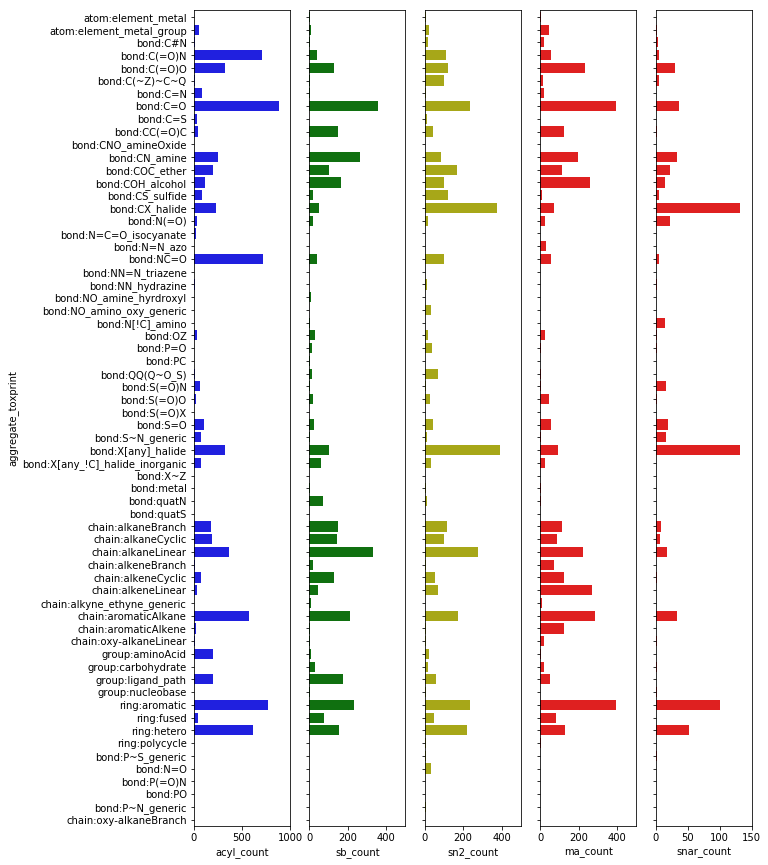

In [59]:
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(10,15), sharey = True)


sns.barplot(x = 'acyl_count', y = 'aggregate_toxprint', color = 'b',label = "acyl_count", data = acyl_sb_sn2_ma_snar, ax=ax1)
sns.barplot(x = 'sb_count', y = 'aggregate_toxprint', color = 'g',label = "sb_count", data = acyl_sb_sn2_ma_snar, ax = ax2)
sns.barplot(x = 'sn2_count', y = 'aggregate_toxprint', color = 'y',label = "sn2_count", data = acyl_sb_sn2_ma_snar, ax= ax3)
sns.barplot(x = 'ma_count', y = 'aggregate_toxprint', color = 'r',label = "ma_count", data = acyl_sb_sn2_ma_snar, ax= ax4)
sns.barplot(x = 'snar_count', y = 'aggregate_toxprint', color = 'r',label = "snar_count", data = acyl_sb_sn2_ma_snar, ax= ax5)

ax1.set_ylabel('aggregate_toxprint')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')

ax1.set_xlabel('acyl_count')
ax2.set_xlabel('sb_count')
ax3.set_xlabel('sn2_count')
ax4.set_xlabel('ma_count')
ax5.set_xlabel('snar_count')


ax1.set_xlim(0,1000)
ax2.set_xlim(0,500)
ax3.set_xlim(0,500)
ax4.set_xlim(0,500)
ax5.set_xlim(0,150)

(0, 150)

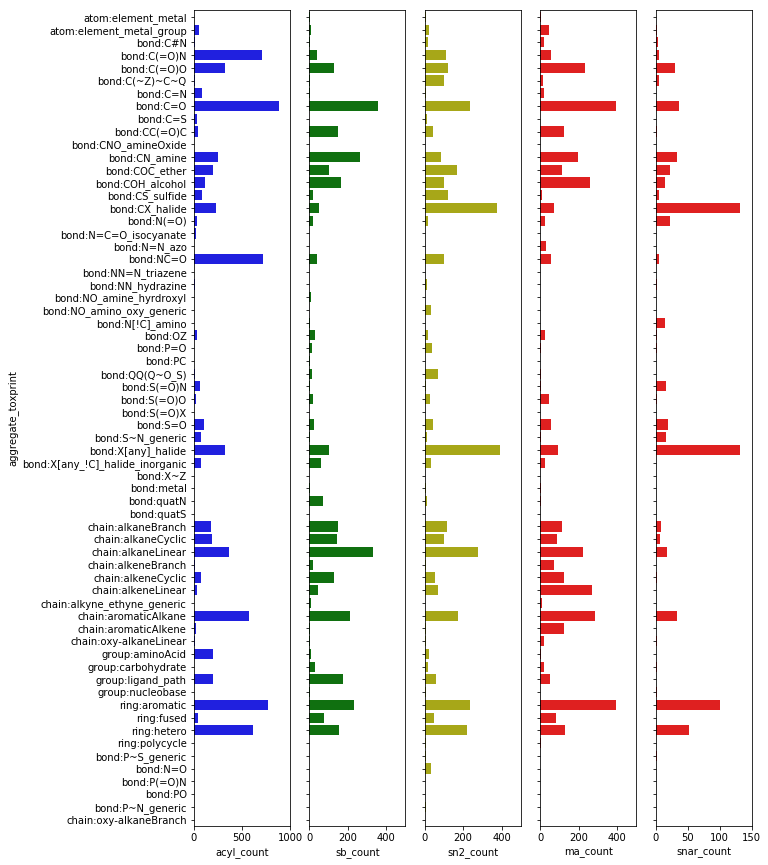

In [60]:
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(10,15), sharey = True)


sns.barplot(x = 'acyl_count', y = 'aggregate_toxprint', color = 'b',label = "acyl_count", data = acyl_sb_sn2_ma_snar, estimator=lambda x: x/len(x), ax=ax1)
sns.barplot(x = 'sb_count', y = 'aggregate_toxprint', color = 'g',label = "sb_count", data = acyl_sb_sn2_ma_snar, estimator=lambda x: x/len(x), ax = ax2)
sns.barplot(x = 'sn2_count', y = 'aggregate_toxprint', color = 'y',label = "sn2_count", data = acyl_sb_sn2_ma_snar, estimator=lambda x: x/len(x), ax= ax3)
sns.barplot(x = 'ma_count', y = 'aggregate_toxprint', color = 'r',label = "ma_count", data = acyl_sb_sn2_ma_snar, estimator=lambda x: x/len(x), ax= ax4)
sns.barplot(x = 'snar_count', y = 'aggregate_toxprint', color = 'r',label = "snar_count", data = acyl_sb_sn2_ma_snar, estimator=lambda x: x/len(x),ax= ax5)

ax1.set_ylabel('aggregate_toxprint')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')

ax1.set_xlabel('acyl_count')
ax2.set_xlabel('sb_count')
ax3.set_xlabel('sn2_count')
ax4.set_xlabel('ma_count')
ax5.set_xlabel('snar_count')


ax1.set_xlim(0,1000)
ax2.set_xlim(0,500)
ax3.set_xlim(0,500)
ax4.set_xlim(0,500)
ax5.set_xlim(0,150)

In [61]:
tox_rxn.head()

DTXSID Dow_domain Enoch_domain      OECD     Enoch Dow OECD_domain  \
0  DTXSID0020020         []     ['Acyl']  ['Acyl']  ['Acyl']  []    ['Acyl']   
1  DTXSID0020022         []           []        []        []  []          []   
2  DTXSID0020024         []           []        []        []  []          []   
3  DTXSID0020070         []       ['SB']    ['SB']    ['SB']  []      ['SB']   
4  DTXSID0020072         []           []        []        []  []          []   

  Consensus_mech rxn_domains  
0       ['Acyl']        Acyl  
1             []   no_domain  
2             []   no_domain  
3         ['SB']          SB  
4             []   no_domain

In [62]:
no_domain = tox_rxn[tox_rxn['rxn_domains']=='no_domain']

In [63]:
nodomain_tps = pd.merge(no_domain, toxprints, on='DTXSID', how='inner' )

In [64]:
nodomain_tps.drop(['Dow_domain', 'Enoch_domain', 'OECD', 'Enoch', 'Dow',
       'OECD_domain', 'Consensus_mech', 'rxn_domains'],axis = 1, inplace = True)

In [65]:
nodomain_tps = nodomain_tps.replace(0, np.nan)

In [66]:
nodomain_tps = nodomain_tps.dropna(how='all')

In [67]:
nd_cols = list(nodomain_tps.columns)
nd_cols = nd_cols[1:-1]
nodomain_tps_long = pd.melt(nodomain_tps, id_vars='DTXSID',value_vars= nd_cols)
nodomain_tps_long.rename(columns={'variable': 'toxprint'}, inplace=True)
tag_nd = {e:k for e in nodomain_tps_long['toxprint'] for k,v in level2_dict.items() if e in v}
nodomain_tps_long['aggregate_toxprint'] = nodomain_tps_long['toxprint']
nodomain_tps_long['aggregate_toxprint'].replace(tag_nd , inplace = True)



nodomain_tps_filt = nodomain_tps_long[nodomain_tps_long.value.notnull()]
nodomain_tps_filt =nodomain_tps_filt.replace('-', np.nan)
nodomain_tps_filt =nodomain_tps_filt[nodomain_tps_filt.value.notnull()]
nodomain_df = nodomain_tps_filt.groupby(['DTXSID','aggregate_toxprint'])[['value']].max().reset_index()

In [68]:
nodomain_df

DTXSID               aggregate_toxprint  value
0      DTXSID0020022                      bond:C(=O)O    1.0
1      DTXSID0020022                         bond:C=O    1.0
2      DTXSID0020022                   bond:COC_ether    1.0
3      DTXSID0020022                   bond:CX_halide    1.0
4      DTXSID0020022                       bond:N(=O)    1.0
5      DTXSID0020022               bond:X[any]_halide    1.0
6      DTXSID0020022             chain:aromaticAlkane    1.0
7      DTXSID0020022                    ring:aromatic    1.0
8      DTXSID0020024                   bond:COC_ether    1.0
9      DTXSID0020024               chain:alkaneLinear    1.0
10     DTXSID0020024               chain:alkeneLinear    1.0
11     DTXSID0020072                    bond:CN_amine    1.0
12     DTXSID0020072               bond:X[any]_halide    1.0
13     DTXSID0020072  bond:X[any_!C]_halide_inorganic    1.0
14     DTXSID0020072                    ring:aromatic    1.0
15     DTXSID0020076                    bond:CN_amine    1.0
16     DTXSID0020076                      ring:hetero    1.0
17     DTXSID0020157                bond:NN_hydrazine    1.0
18     DTXSID0020157                 bond:N[!C]_amino    1.0
19     DTXSID0020157               bond:X[any]_halide    1.0
20     DTXSID0020157  bond:X[any_!C]_halide_inorganic    1.0
21     DTXSID0020157             chain:aromaticAlkane    1.0
22     DTXSID0020157                    ring:aromatic    1.0
23     DTXSID0020232                      bond:C(=O)N    1.0
24     DTXSID0020232                         bond:C=O    1.0
25     DTXSID0020232                    bond:CN_amine    1.0
26     DTXSID0020232                        bond:NC=O    1.0
27     DTXSID0020232                 group:nucleobase    1.0
28     DTXSID0020232                      ring:hetero    1.0
29     DTXSID0020280                   bond:CX_halide    1.0
...              ...                              ...    ...
25746  DTXSID9057846                      bond:C(=O)O    1.0
25747  DTXSID9057846                         bond:C=O    1.0
25748  DTXSID9057846                     bond:CC(=O)C    1.0
25749  DTXSID9057846                    bond:CN_amine    1.0
25750  DTXSID9057846                   bond:CX_halide    1.0
25751  DTXSID9057846               bond:X[any]_halide    1.0
25752  DTXSID9057846               chain:alkaneCyclic    1.0
25753  DTXSID9057846               chain:alkeneCyclic    1.0
25754  DTXSID9057846             chain:aromaticAlkane    1.0
25755  DTXSID9057846                    ring:aromatic    1.0
25756  DTXSID9057846                      ring:hetero    1.0
25757  DTXSID9057848                      bond:C(=O)N    1.0
25758  DTXSID9057848                         bond:C=O    1.0
25759  DTXSID9057848                     bond:CC(=O)C    1.0
25760  DTXSID9057848                    bond:CN_amine    1.0
25761  DTXSID9057848                  bond:CS_sulfide    1.0
25762  DTXSID9057848                   bond:CX_halide    1.0
25763  DTXSID9057848                        bond:NC=O    1.0
25764  DTXSID9057848               bond:X[any]_halide    1.0
25765  DTXSID9057848               chain:alkaneCyclic    1.0
25766  DTXSID9057848               chain:alkaneLinear    1.0
25767  DTXSID9057848               chain:alkeneCyclic    1.0
25768  DTXSID9057848             chain:aromaticAlkane    1.0
25769  DTXSID9057848                    ring:aromatic    1.0
25770  DTXSID9057848                      ring:hetero    1.0
25771  DTXSID9058654                 bond:COH_alcohol    1.0
25772  DTXSID9058654               chain:alkaneBranch    1.0
25773  DTXSID9058654               chain:alkaneLinear    1.0
25774  DTXSID9058654             chain:aromaticAlkane    1.0
25775  DTXSID9058654                    ring:aromatic    1.0

[25776 rows x 3 columns]

In [71]:
nodom = nodomain_df.groupby('aggregate_toxprint').count().reset_index()

In [72]:
nodom

aggregate_toxprint  DTXSID  value
0           atom:element_main_group       1      1
1                atom:element_metal     136    136
2          atom:element_metal_group     209    209
3                          bond:C#N     148    148
4                       bond:C(=O)N     565    565
5                       bond:C(=O)O    1168   1168
6                    bond:C(~Z)~C~Q      31     31
7                          bond:C=N     142    142
8                          bond:C=O    1980   1980
9                          bond:C=S      43     43
10                     bond:CC(=O)C     401    401
11              bond:CNO_amineOxide      14     14
12                    bond:CN_amine    1575   1575
13                   bond:COC_ether    1018   1018
14                 bond:COH_alcohol    1257   1257
15                  bond:CS_sulfide     192    192
16                   bond:CX_halide     818    818
17                       bond:N(=O)     231    231
18            bond:N=C=O_isocyanate       1      1
19                     bond:N=N_azo      18     18
20                         bond:N=O       5      5
21           bond:N=[N+]=[N-]_azide       3      3
22                        bond:NC=O     571    571
23               bond:NN=N_triazene       8      8
24                bond:NN_hydrazine      81     81
25          bond:NO_amine_hyrdroxyl      19     19
26        bond:NO_amino_oxy_generic      32     32
27                 bond:N[!C]_amino      86     86
28                          bond:OZ     161    161
29                      bond:P(=O)N       5      5
..                              ...     ...    ...
39                      bond:S(=O)X       7      7
40                         bond:S=O     367    367
41                        bond:Se~Q       5      5
42                 bond:S~N_generic     144    144
43               bond:X[any]_halide    1141   1141
44  bond:X[any_!C]_halide_inorganic     342    342
45                         bond:X~Z      53     53
46                       bond:metal     104    104
47                       bond:quatN      82     82
48           bond:quatP_phosphonium      13     13
49                       bond:quatS       3      3
50               chain:alkaneBranch     985    985
51               chain:alkaneCyclic     815    815
52               chain:alkaneLinear    2133   2133
53               chain:alkeneBranch      55     55
54               chain:alkeneCyclic     373    373
55               chain:alkeneLinear     245    245
56      chain:alkyne_ethyne_generic      29     29
57             chain:aromaticAlkane    1772   1772
58             chain:aromaticAlkene      57     57
59           chain:oxy-alkaneBranch       2      2
60           chain:oxy-alkaneLinear      97     97
61                  group:aminoAcid      82     82
62               group:carbohydrate     148    148
63                group:ligand_path     515    515
64                 group:nucleobase      74     74
65                    ring:aromatic    2471   2471
66                       ring:fused     225    225
67                      ring:hetero    1806   1806
68                   ring:polycycle      37     37

[69 rows x 3 columns]

In [73]:
all_domains = pd.merge(acyl_sb_sn2_ma_snar, nodom, on='aggregate_toxprint', how = 'outer')

In [74]:
all_domains.head()

aggregate_toxprint  acyl_count  sb_count  sn2_count  ma_count  \
0        atom:element_metal         3.0       5.0        8.0       5.0   
1  atom:element_metal_group        56.0      11.0       24.0      48.0   
2                  bond:C#N        12.0       6.0       18.0      18.0   
3               bond:C(=O)N       708.0      40.0      109.0      57.0   
4               bond:C(=O)O       327.0     129.0      123.0     233.0   

   snar_count  DTXSID  value  
0         NaN     136    136  
1         3.0     209    209  
2         4.0     148    148  
3         5.0     565    565  
4        31.0    1168   1168

In [75]:
all_domains.rename(columns = {'DTXSID': 'nodomain_count'}, inplace = True)

In [76]:
all_domains = all_domains.drop(['value'], axis = 1)

In [77]:
all_domains

aggregate_toxprint  acyl_count  sb_count  \
0                                  atom:element_metal         3.0       5.0   
1                            atom:element_metal_group        56.0      11.0   
2                                            bond:C#N        12.0       6.0   
3                                         bond:C(=O)N       708.0      40.0   
4                                         bond:C(=O)O       327.0     129.0   
5                                      bond:C(~Z)~C~Q         8.0       5.0   
6                                            bond:C=N        90.0       6.0   
7                                            bond:C=O       884.0     358.0   
8                                            bond:C=S        32.0       NaN   
9                                        bond:CC(=O)C        41.0     148.0   
10                                bond:CNO_amineOxide         1.0       1.0   
11                                      bond:CN_amine       255.0     262.0   
12                                     bond:COC_ether       200.0     104.0   
13                                   bond:COH_alcohol       119.0     163.0   
14                                    bond:CS_sulfide        85.0      19.0   
15                                     bond:CX_halide       232.0      52.0   
16                                         bond:N(=O)        36.0      20.0   
17                              bond:N=C=O_isocyanate        27.0       NaN   
18                                       bond:N=N_azo         1.0       NaN   
19                                          bond:NC=O       716.0      40.0   
20                                 bond:NN=N_triazene         1.0       NaN   
21                                  bond:NN_hydrazine        13.0       NaN   
22                            bond:NO_amine_hyrdroxyl         4.0      11.0   
23                          bond:NO_amino_oxy_generic         3.0       1.0   
24                                   bond:N[!C]_amino         7.0       2.0   
25                                            bond:OZ        30.0      30.0   
26                                           bond:P=O         4.0      16.0   
27                                            bond:PC         1.0       2.0   
28                                     bond:QQ(Q~O_S)        11.0      14.0   
29                                        bond:S(=O)N        69.0       5.0   
..                                                ...         ...       ...   
39                                         bond:quatS         1.0       NaN   
40                                 chain:alkaneBranch       184.0     150.0   
41                                 chain:alkaneCyclic       190.0     145.0   
42                                 chain:alkaneLinear       370.0     332.0   
43                                 chain:alkeneBranch         8.0      21.0   
44                                 chain:alkeneCyclic        75.0     128.0   
45                                 chain:alkeneLinear        35.0      44.0   
46                        chain:alkyne_ethyne_generic         7.0       9.0   
47                               chain:aromaticAlkane       571.0     213.0   
48                               chain:aromaticAlkene        19.0       6.0   
49                             chain:oxy-alkaneLinear         8.0       6.0   
50                                    group:aminoAcid       201.0       8.0   
51                                 group:carbohydrate         7.0      30.0   
52                                  group:ligand_path       196.0     176.0   
53                                   group:nucleobase         7.0       3.0   
54                                      ring:aromatic       773.0     234.0   
55                                         ring:fused        46.0      78.0   
56                                        ring:hetero       611.0     154.0   
57                                     ring:polycycle         2.0       1.0   
58    

(0, 5000)

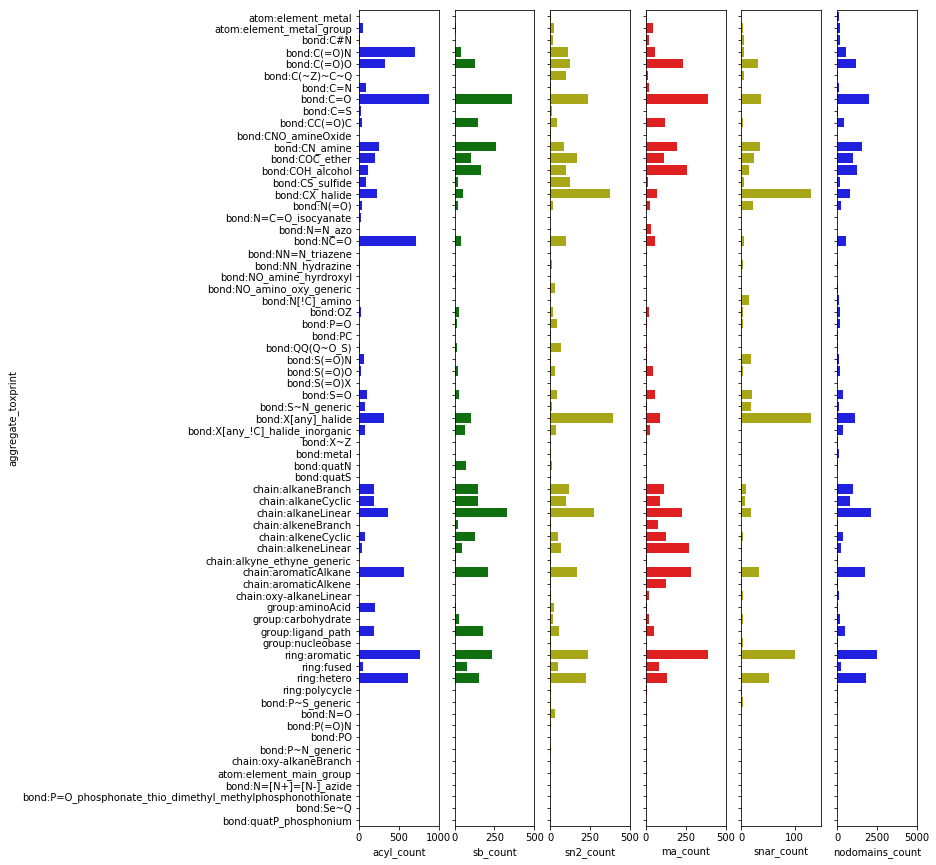

In [78]:
f,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6, figsize=(10,15), sharey = True)


sns.barplot(x = 'acyl_count', y = 'aggregate_toxprint', color = 'b',label = "acyl_count", data = all_domains, ax=ax1)
sns.barplot(x = 'sb_count', y = 'aggregate_toxprint', color = 'g',label = "sb_count", data = all_domains, ax = ax2)
sns.barplot(x = 'sn2_count', y = 'aggregate_toxprint', color = 'y',label = "sn2_count", data = all_domains, ax= ax3)
sns.barplot(x = 'ma_count', y = 'aggregate_toxprint', color = 'r',label = "ma_count", data = all_domains, ax= ax4)
sns.barplot(x = 'snar_count', y = 'aggregate_toxprint', color = 'y',label = "snar_count", data = all_domains, ax= ax5)
sns.barplot(x = 'nodomain_count', y = 'aggregate_toxprint', color = 'b',label = "snar_count", data = all_domains, ax= ax6)

ax1.set_ylabel('aggregate_toxprint')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')
ax6.set_ylabel('')

ax1.set_xlabel('acyl_count')
ax2.set_xlabel('sb_count')
ax3.set_xlabel('sn2_count')
ax4.set_xlabel('ma_count')
ax5.set_xlabel('snar_count')
ax6.set_xlabel('nodomains_count')

ax1.set_xlim(0,1000)
ax2.set_xlim(0,500)
ax3.set_xlim(0,500)
ax4.set_xlim(0,500)
ax5.set_xlim(0,150)
ax6.set_xlim(0,5000)

In [79]:
df = all_domains.copy()

In [80]:
df.head()

aggregate_toxprint  acyl_count  sb_count  sn2_count  ma_count  \
0        atom:element_metal         3.0       5.0        8.0       5.0   
1  atom:element_metal_group        56.0      11.0       24.0      48.0   
2                  bond:C#N        12.0       6.0       18.0      18.0   
3               bond:C(=O)N       708.0      40.0      109.0      57.0   
4               bond:C(=O)O       327.0     129.0      123.0     233.0   

   snar_count  nodomain_count  
0         NaN             136  
1         3.0             209  
2         4.0             148  
3         5.0             565  
4        31.0            1168

In [81]:
df = df.drop(['nodomain_count'], axis = 1)

In [82]:
df['Sum'] = df.sum(axis = 1)
df.loc['Total'] = df.sum()

In [83]:
df.set_index('aggregate_toxprint', inplace = True)

In [84]:
df.index.tolist()

['atom:element_metal',
 'atom:element_metal_group',
 'bond:C#N',
 'bond:C(=O)N',
 'bond:C(=O)O',
 'bond:C(~Z)~C~Q',
 'bond:C=N',
 'bond:C=O',
 'bond:C=S',
 'bond:CC(=O)C',
 'bond:CNO_amineOxide',
 'bond:CN_amine',
 'bond:COC_ether',
 'bond:COH_alcohol',
 'bond:CS_sulfide',
 'bond:CX_halide',
 'bond:N(=O)',
 'bond:N=C=O_isocyanate',
 'bond:N=N_azo',
 'bond:NC=O',
 'bond:NN=N_triazene',
 'bond:NN_hydrazine',
 'bond:NO_amine_hyrdroxyl',
 'bond:NO_amino_oxy_generic',
 'bond:N[!C]_amino',
 'bond:OZ',
 'bond:P=O',
 'bond:PC',
 'bond:QQ(Q~O_S)',
 'bond:S(=O)N',
 'bond:S(=O)O',
 'bond:S(=O)X',
 'bond:S=O',
 'bond:S~N_generic',
 'bond:X[any]_halide',
 'bond:X[any_!C]_halide_inorganic',
 'bond:X~Z',
 'bond:metal',
 'bond:quatN',
 'bond:quatS',
 'chain:alkaneBranch',
 'chain:alkaneCyclic',
 'chain:alkaneLinear',
 'chain:alkeneBranch',
 'chain:alkeneCyclic',
 'chain:alkeneLinear',
 'chain:alkyne_ethyne_generic',
 'chain:aromaticAlkane',
 'chain:aromaticAlkene',
 'chain:oxy-alkaneLinear',
 'group:a

In [85]:
df.rename(index = {'atom:element_metalatom:element_metal_groupbond:C#Nbond:C(=O)Nbond:C(=O)Obond:C(~Z)~C~Qbond:C=Nbond:C=Obond:C=Sbond:CC(=O)Cbond:CNO_amineOxidebond:CN_aminebond:COC_etherbond:COH_alcoholbond:CS_sulfidebond:CX_halidebond:N(=O)bond:N=C=O_isocyanatebond:N=N_azobond:NC=Obond:NN=N_triazenebond:NN_hydrazinebond:NO_amine_hyrdroxylbond:NO_amino_oxy_genericbond:N[!C]_aminobond:OZbond:P=Obond:PCbond:QQ(Q~O_S)bond:S(=O)Nbond:S(=O)Obond:S(=O)Xbond:S=Obond:S~N_genericbond:X[any]_halidebond:X[any_!C]_halide_inorganicbond:X~Zbond:metalbond:quatNbond:quatSchain:alkaneBranchchain:alkaneCyclicchain:alkaneLinearchain:alkeneBranchchain:alkeneCyclicchain:alkeneLinearchain:alkyne_ethyne_genericchain:aromaticAlkanechain:aromaticAlkenechain:oxy-alkaneLineargroup:aminoAcidgroup:carbohydrategroup:ligand_pathgroup:nucleobasering:aromaticring:fusedring:heteroring:polycyclebond:P~S_genericbond:N=Obond:P(=O)Nbond:PObond:P~N_genericchain:oxy-alkaneBranchatom:element_main_groupbond:N=[N+]=[N-]_azidebond:P=O_phosphonate_thio_dimethyl_methylphosphonothionatebond:Se~Qbond:quatP_phosphonium': 'Sum'}, inplace = True)

In [86]:
df

acyl_count  sb_count  \
aggregate_toxprint                                                         
atom:element_metal                                         3.0       5.0   
atom:element_metal_group                                  56.0      11.0   
bond:C#N                                                  12.0       6.0   
bond:C(=O)N                                              708.0      40.0   
bond:C(=O)O                                              327.0     129.0   
bond:C(~Z)~C~Q                                             8.0       5.0   
bond:C=N                                                  90.0       6.0   
bond:C=O                                                 884.0     358.0   
bond:C=S                                                  32.0       NaN   
bond:CC(=O)C                                              41.0     148.0   
bond:CNO_amineOxide                                        1.0       1.0   
bond:CN_amine                                            255.0     262.0   
bond:COC_ether                                           200.0     104.0   
bond:COH_alcohol                                         119.0     163.0   
bond:CS_sulfide                                           85.0      19.0   
bond:CX_halide                                           232.0      52.0   
bond:N(=O)                                                36.0      20.0   
bond:N=C=O_isocyanate                                     27.0       NaN   
bond:N=N_azo                                               1.0       NaN   
bond:NC=O                                                716.0      40.0   
bond:NN=N_triazene                                         1.0       NaN   
bond:NN_hydrazine                                         13.0       NaN   
bond:NO_amine_hyrdroxyl                                    4.0      11.0   
bond:NO_amino_oxy_generic                                  3.0       1.0   
bond:N[!C]_amino                                           7.0       2.0   
bond:OZ                                                   30.0      30.0   
bond:P=O                                                   4.0      16.0   
bond:PC                                                    1.0       2.0   
bond:QQ(Q~O_S)                                            11.0      14.0   
bond:S(=O)N                                               69.0       5.0   
...                                                        ...       ...   
chain:alkaneBranch                                       184.0     150.0   
chain:alkaneCyclic                                       190.0     145.0   
chain:alkaneLinear                                       370.0     332.0   
chain:alkeneBranch                                         8.0      21.0   
chain:alkeneCyclic                                        75.0     128.0   
chain:alkeneLinear                                        35.0      44.0   
chain:alkyne_ethyne_generic                                7.0       9.0   
chain:aromaticAlkane                                     571.0     213.0   
chain:aromaticAlkene                                      19.0       6.0   
chain:oxy-alkaneLinear                                     8.0       6.0   
group:aminoAcid                                          201.0       8.0   
group:carbohydrate                                         7.0      30.0   
group:ligand_path                                        196.0     176.0   
group:nucleobase                                           7.0       3.0   
ring:aromatic                                            773.0     234.0   
ring:fused                                                46.0      78.0   
ring:hetero                                              611.0     154.0   
ring:polycycle                                             2.0       1.0   
bond:P~S_generic                                           NaN       1.0   
bond:N=O                                                   NaN       NaN   
bond:P(=O)N             

In [87]:
observed = df.iloc[0:69, 0:5]

In [88]:
expected =  np.outer(df['Sum'][0:69], df.ix['Sum'][0:5]) / 19978.0


/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [89]:
mylist = df.index.tolist()

In [90]:
mylist.pop()

'Sum'

In [91]:
expected = pd.DataFrame(expected)

In [92]:
expected.columns = ['acyl_count', 'sb_count', 'sn2_count', 'ma_count', 'snar_count']
expected.index = mylist

In [93]:
import scipy.stats as stats

In [94]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

7330.719976569978


In [95]:
len(mylist)

69

In [96]:
len(expected.columns)

5

In [97]:
68*4

272

In [98]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 272)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=272)
print("P value")
print(p_value)

Critical value
311.46719186327334
P value
0.0


In [99]:
xls2 = pd.ExcelFile('jrc_all_merged.xlsx')

In [100]:
xls2.sheet_names

['jrc_merge']

In [101]:
jrc = xls2.parse('jrc_merge')

In [102]:
jrc

DTXSID       CASRN  \
0     DTXSID1031626   1896-62-4   
1     DTXSID4051879   2277-19-2   
2    DTXSID00231670  82297-64-1   
3     DTXSID7049398    116-26-7   
4     DTXSID7026235    552-30-7   
5     DTXSID5032523   2634-33-5   
6     DTXSID8026515     85-42-7   
7     DTXSID5021881    107-15-3   
8     DTXSID4021137    108-45-2   
9     DTXSID9021138    106-50-3   
10    DTXSID1049273   3344-77-2   
11    DTXSID3021803     93-91-4   
12    DTXSID6021903    109-65-9   
13    DTXSID2044395    143-15-7   
14    DTXSID2049397    112-82-3   
15    DTXSID4021929    111-25-1   
16    DTXSID1021740     71-36-3   
17    DTXSID1041263     83-42-1   
18   DTXSID00148597   1086-00-6   
19    DTXSID3027536   3386-33-2   
20    DTXSID0049317    544-77-4   
21    DTXSID2049341    638-45-9   
22    DTXSID3029152    119-10-8   
23    DTXSID6021793     90-15-3   
24    DTXSID4051586   1139-30-6   
25    DTXSID3060372    579-07-7   
26    DTXSID7049396   1118-71-4   
27    DTXSID8020462    111-46-6   
28    DTXSID6021583    431-03-8   
29    DTXSID3025910     88-88-0   
..              ...         ...   
192   DTXSID3021483    122-78-1   
193   DTXSID9026342     60-12-8   
194   DTXSID2021159     85-44-9   
195   DTXSID2026997    123-11-5   
196   DTXSID5021201    121-79-9   
197   DTXSID4022527     94-13-3   
198   DTXSID0021206     57-55-6   
199   DTXSID9021924    110-86-1   
200   DTXSID2021238    108-46-3   
201   DTXSID5021251     81-07-2   
202   DTXSID7026368     69-72-7   
203   DTXSID0047111    515-03-7   
204   DTXSID1026031    151-21-3   
205   DTXSID9049409   2892-51-5   
206  DTXSID30200334   5231-87-8   
207   DTXSID9026053   3810-74-0   
208   DTXSID6023602    110-15-6   
209   DTXSID4023622     63-74-1   
210   DTXSID6024464    121-57-3   
211   DTXSID8023632     87-69-4   
212  DTXSID90225265   7426-07-5   
213   DTXSID5021332    137-26-8   
214   DTXSID5046512     96-27-5   
215   DTXSID7026156    584-84-9   
216   DTXSID5047035   3913-81-3   
217   DTXSID1041425   6728-26-3   
218   DTXSID8049416    533-75-5   
219   DTXSID3037757    112-45-8   
220   DTXSID0021969    121-33-5   
221   DTXSID8021438     75-35-4   

                                                SMILES  \
0                               CC(=O)\C=C\C1=CC=CC=C1   
1                                       CC\C=C/CCCCC=O   
2                          CCC(=O)\C=C\C1=CC=C(OC)C=C1   
3                               CC1=C(C=O)C(C)(C)CC=C1   
4                       OC(=O)C1=CC=C2C(=O)OC(=O)C2=C1   
5                                   O=C1NSC2=C1C=CC=C2   
6                                  O=C1OC(=O)C2CCCCC12   
7                                                 NCCN   
8                                      NC1=CC(N)=CC=C1   
9                                      NC1=CC=C(N)C=C1   
10                                     OCCCCCCCCCCCCBr   
11                             CC(=O)CC(=O)C1=CC=CC=C1   
12                                              CCCCBr   
13                                      CCCCCCCCCCCCBr   
14                                  CCCCCCCCCCCCCCCCBr   
15                                            CCCCCCBr   
16                                               CCCCO   
17                        CC1=C(C=CC=C1Cl)[N+]([O-])=O   
18               ClCC1=C2C=CC3=CC=CC4=C3C2=C(C=C1)C=C4   
19                                CCCCCCCCCCCCCCCCCCCl   
20                                   CCCCCCCCCCCCCCCCI   
21                                             CCCCCCI   
22                        COC1=CC=C(C)C=C1[N+]([O-])=O   
23                                OC1=CC=CC2=CC=CC=C12   
24      C[C@@]12CC[C@@H]3[C@H](CC3(C)C)C(=C)CC[C@H]1O2   
25                              CC(=O)C(=O)C1=CC=CC=C1   
26                         CC(C)(C)C(=O)CC(=O)C(C)(C)C   
27                                             OCCOCCO   
28                                        CC(=O)C(C)=O   
29   [O-][N+](=O)C1=CC(=C(Cl)C(=C1)[N+]([O-])=O)[N+...   
..                                          

In [103]:
consensus = []
for x,y,z in list(zip(jrc['Enoch'],jrc['Dow'],jrc['OECD'])):
    if x == y and y == z and x == z:
        consensus.append(x)
    elif x == y and y !=z:
        consensus.append(x)
    elif x == z and x != [] and y !=z:
        consensus.append(x)
    elif y == z and y != [] and x !=z:
        consensus.append(y)
    elif x == [] and y == [] and z !=[]:
        consensus.append(z)
    elif x == [] and z == [] and y !=[]:
        consensus.append(y)
    elif y == [] and z == [] and x !=[]:
        consensus.append(x)
    else:
        consensus.append(['inconclusive'])
jrc['Consensus_mech'] = consensus

In [104]:
xls3 = pd.ExcelFile('jrc_txps.xlsx')

In [105]:
xls3.sheet_names

['ChemistryDashboard-Batch-Search_2019-02-18_16_12_54']

In [106]:
jrc_tps = xls3.parse('ChemistryDashboard-Batch-Search_2019-02-18_16_12_54')

In [107]:
jrc_tp = pd.merge(jrc, jrc_tps, on='DTXSID', how='inner' )

In [108]:
jrc.head()

DTXSID       CASRN                          SMILES  \
0   DTXSID1031626   1896-62-4          CC(=O)\C=C\C1=CC=CC=C1   
1   DTXSID4051879   2277-19-2                  CC\C=C/CCCCC=O   
2  DTXSID00231670  82297-64-1     CCC(=O)\C=C\C1=CC=C(OC)C=C1   
3   DTXSID7049398    116-26-7          CC1=C(C=O)C(C)(C)CC=C1   
4   DTXSID7026235    552-30-7  OC(=O)C1=CC=C2C(=O)OC(=O)C2=C1   

  reaction_chemistry_domain Expert_Mech           OECD         Enoch  \
0                        MA      ['MA']  ['MA', 'SN2']        ['MA']   
1                        SB      ['SB']         ['SB']        ['SB']   
2                        MA      ['MA']  ['MA', 'SN2']        ['MA']   
3                        MA      ['MA']             []  ['MA', 'SB']   
4                      Acyl    ['Acyl']       ['Acyl']      ['Acyl']   

        Dow  LLNA  DPRA KeratinoSens  hCLAT  Consensus_mech  
0    ['MA']     1   1.0            1    1.0          ['MA']  
1    ['SB']     1   0.0            1    NaN          ['SB']  
2    ['MA']     1   1.0            1    NaN          ['MA']  
3    ['SB']     1   1.0            1    NaN  [inconclusive]  
4  ['Acyl']     1   1.0            0    1.0        ['Acyl']

In [109]:
jrc.columns

Index(['DTXSID', 'CASRN', 'SMILES', 'reaction_chemistry_domain', 'Expert_Mech',
       'OECD', 'Enoch', 'Dow', 'LLNA', 'DPRA', 'KeratinoSens', 'hCLAT',
       'Consensus_mech'],
      dtype='object')

In [110]:
jrc_tp = jrc_tp.drop(['CASRN', 'SMILES', 'reaction_chemistry_domain', 'Expert_Mech',
       'OECD', 'Enoch', 'Dow','DPRA', 'KeratinoSens', 'hCLAT'], axis = 1)

In [111]:
#jrc_tp['Consensus_mech'].apply(lambda x: ''.join(x))

#jrc_tp['Consensus_mech'].apply(lambda x: ''.join(map(str, x)))
#jrc_tp['Consensus_mech'].apply(''.join)
jrc_tp['rxn_domains'] = jrc_tp['Consensus_mech'].astype(str).str.replace('\[|\]|\'', '')

In [112]:
jrc_tp.rxn_domains.value_counts()

                95
MA              38
SB              33
SN2             25
inconclusive    15
Acyl            12
SNAR             3
MA, SN2          1
Name: rxn_domains, dtype: int64

In [113]:
jrc_tp.head()

DTXSID  LLNA  Consensus_mech  atom:element_main_group  \
0   DTXSID1031626     1          ['MA']                        0   
1   DTXSID4051879     1          ['SB']                        0   
2  DTXSID00231670     1          ['MA']                        0   
3   DTXSID7049398     1  [inconclusive]                        0   
4   DTXSID7026235     1        ['Acyl']                        0   

   atom:element_metal_group_I_II  atom:element_metal_group_III  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   atom:element_metal_metalloid  atom:element_metal_poor_metal  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   atom:element_metal_transistion_metal  atom:element_noble_gas      ...       \
0                                     0                       0      ...        
1                                     0                       0      ...        
2                                     0                       0      ...        
3                                     0                       0      ...        
4                                     0                       0      ...        

   ring:polycycle_spiro_[2.2]pentane  ring:polycycle_spiro_[2.5]octane  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4                                  0                                 0   

   ring:polycycle_spiro_[4.5]decane  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   ring:polycycle_tricyclo_[3.7.7]bullvalene  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   ring:polycycle_tricyclo_[3.7.7]semibullvalene  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   ring:polycycle_tricyclo_adamantane  ring:polycycle_tricyclo_benzvalene  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0  

In [114]:
dummy= pd.get_dummies(jrc_tp['rxn_domains'])

In [115]:
dummy.iloc[:,0]
dummy = dummy.rename(columns={dummy.columns[0]: 'no_domain'})

In [116]:
jrc_tp = pd.concat([jrc_tp, dummy], axis = 1)
jrc_tp.head()

DTXSID  LLNA  Consensus_mech  atom:element_main_group  \
0   DTXSID1031626     1          ['MA']                        0   
1   DTXSID4051879     1          ['SB']                        0   
2  DTXSID00231670     1          ['MA']                        0   
3   DTXSID7049398     1  [inconclusive]                        0   
4   DTXSID7026235     1        ['Acyl']                        0   

   atom:element_metal_group_I_II  atom:element_metal_group_III  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   atom:element_metal_metalloid  atom:element_metal_poor_metal  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   atom:element_metal_transistion_metal  atom:element_noble_gas      ...       \
0                                     0                       0      ...        
1                                     0                       0      ...        
2                                     0                       0      ...        
3                                     0                       0      ...        
4                                     0                       0      ...        

   ring:polycycle_tricyclo_benzvalene   rxn_domains  no_domain  Acyl  MA  \
0                                   0            MA          0     0   1   
1                                   0            SB          0     0   0   
2                                   0            MA          0     0   1   
3                                   0  inconclusive          0     0   0   
4                                   0          Acyl          0     1   0   

   MA, SN2  SB  SN2  SNAR  inconclusive  
0        0   0    0     0             0  
1        0   1    0     0             0  
2        0   0    0     0             0  
3        0   0    0     0             1  
4        0   0    0     0             0  

[5 rows x 741 columns]

In [117]:
#jrc_tp = jrc_tp.drop(['rxn_domains', 'Consensus_mech'],axis = 1)

In [118]:
jrc_tp = jrc_tp.drop(['MA, SN2', 'inconclusive'], axis = 1)

In [119]:
pd.crosstab(jrc_tp['no_domain'], jrc_tp['ring:polycycle_tricyclo_adamantane'])

ring:polycycle_tricyclo_adamantane    0
no_domain                              
0                                   127
1                                    95

In [120]:
jrc_tp.head()

DTXSID  LLNA  Consensus_mech  atom:element_main_group  \
0   DTXSID1031626     1          ['MA']                        0   
1   DTXSID4051879     1          ['SB']                        0   
2  DTXSID00231670     1          ['MA']                        0   
3   DTXSID7049398     1  [inconclusive]                        0   
4   DTXSID7026235     1        ['Acyl']                        0   

   atom:element_metal_group_I_II  atom:element_metal_group_III  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   atom:element_metal_metalloid  atom:element_metal_poor_metal  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   atom:element_metal_transistion_metal  atom:element_noble_gas  ...   \
0                                     0                       0  ...    
1                                     0                       0  ...    
2                                     0                       0  ...    
3                                     0                       0  ...    
4                                     0                       0  ...    

   ring:polycycle_tricyclo_[3.7.7]semibullvalene  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   ring:polycycle_tricyclo_adamantane  ring:polycycle_tricyclo_benzvalene  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

    rxn_domains  no_domain  Acyl  MA  SB  SN2  SNAR  
0            MA          0     0   1   0    0     0  
1            SB          0     0   0   1    0     0  
2            MA          0     0   1   0    0     0  
3  inconclusive          0     0   0   0    0     0  
4          Acyl          0     1   0   0    0     0  

[5 rows x 739 columns]

In [121]:
jrc_tp.columns.get_loc("ring:polycycle_tricyclo_benzvalene")

731

In [122]:
jrc_tp.iloc[:,2:732] = jrc_tp.iloc[:, 2:732].replace(0,np.nan)

In [123]:
jrc_tp = jrc_tp.dropna(axis = 1, how = 'all')

In [124]:
jrc_tp.head()

DTXSID  LLNA  Consensus_mech  atom:element_metal_group_I_II  \
0   DTXSID1031626     1          ['MA']                            NaN   
1   DTXSID4051879     1          ['SB']                            NaN   
2  DTXSID00231670     1          ['MA']                            NaN   
3   DTXSID7049398     1  [inconclusive]                            NaN   
4   DTXSID7026235     1        ['Acyl']                            NaN   

   bond:C#N_nitrile_ab-unsaturated  bond:C#N_nitrile_generic  \
0                              NaN                       NaN   
1                              NaN                       NaN   
2                              NaN                       NaN   
3                              NaN                       NaN   
4                              NaN                       NaN   

   bond:C#N_nitrile  bond:C(~Z)~C~Q_b-halocarbonyl  \
0               NaN                            NaN   
1               NaN                            NaN   
2               NaN                            NaN   
3               NaN                            NaN   
4               NaN                            NaN   

   bond:C(=O)N_carbamate_dithio  bond:C(=O)N_carboxamide_(NHR)  ...   \
0                           NaN                            NaN  ...    
1                           NaN                            NaN  ...    
2                           NaN                            NaN  ...    
3                           NaN                            NaN  ...    
4                           NaN                            NaN  ...    

   ring:hetero_[6_6_6]_O_benzopyran_dibenzo[b_e]  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   ring:hetero_[7]_generic_1_4-Z  ring:polycycle_bicyclo_[2.1.1]heptane  \
0                            NaN                                    NaN   
1                            NaN                                    NaN   
2                            NaN                                    NaN   
3                            NaN                                    NaN   
4                            NaN                                    NaN   

    rxn_domains  no_domain  Acyl  MA  SB  SN2  SNAR  
0            MA          0     0   1   0    0     0  
1            SB          0     0   0   1    0     0  
2            MA          0     0   1   0    0     0  
3  inconclusive          0     0   0   0    0     0  
4          Acyl          0     1   0   0    0     0  

[5 rows x 253 columns]

In [125]:
jrc_tp.columns.get_loc('ring:polycycle_bicyclo_[2.1.1]heptane')

245

In [126]:
jrc_tp.iloc[:,2:246] = jrc_tp.iloc[:, 2:246].replace(np.nan,0)

In [127]:
jrc_tp.iloc[:,3:246]

atom:element_metal_group_I_II  bond:C#N_nitrile_ab-unsaturated  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2                              0.0                              0.0   
3                              0.0                              0.0   
4                              0.0                              0.0   
5                              0.0                              0.0   
6                              0.0                              0.0   
7                              0.0                              0.0   
8                              0.0                              0.0   
9                              0.0                              0.0   
10                             0.0                              0.0   
11                             0.0                              0.0   
12                             0.0                              0.0   
13                             0.0                              0.0   
14                             0.0                              0.0   
15                             0.0                              0.0   
16                             0.0                              0.0   
17                             0.0                              0.0   
18                             0.0                              0.0   
19                             0.0                              0.0   
20                             0.0                              0.0   
21                             0.0                              0.0   
22                             0.0                              0.0   
23                             0.0                              0.0   
24                             0.0                              0.0   
25                             0.0                              0.0   
26                             0.0                              0.0   
27                             0.0                              0.0   
28                             0.0                              0.0   
29                             0.0                              0.0   
..                             ...                              ...   
192                            0.0                              0.0   
193                            0.0                              0.0   
194                            0.0                              0.0   
195                            0.0                              0.0   
196                            0.0                              0.0   
197                            0.0                              0.0   
198                            0.0                              0.0   
199                            0.0                              0.0   
200                            0.0                              0.0   
201                            0.0                              0.0   
202                            0.0                              0.0   
203                            0.0                              0.0   
204                            1.0                              0.0   
205                            0.0                              0.0   
206                            0.0                              0.0   
207                            0.0                              0.0   
208                            0.0                              0.0   
209                            0.0                              0.0   
210                            0.0                              0.0   
211                            0.0                              0.0   
212                            0.0                              0.0   
213                            0.0                              0.0   
214                            0.0                              0.0   
215                            0.0                              0.0   
216                          

In [128]:
import re
np.sum([jrc_tp[col].str.contains(r"\-", na = False) for col in jrc_tp])

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [129]:
import scipy.stats as stats
od = pd.crosstab(jrc_tp['bond:C#N_nitrile_ab-unsaturated'],jrc_tp['MA']).values
oddsratio, pvalue = stats.fisher_exact(od)
print(oddsratio, pvalue)

4.945945945945946 0.3136847254493478


In [130]:
mini = jrc_tp.head(30)

In [131]:
mini2 = mini.iloc[:,3:]

In [132]:
mini2 = mini2.drop(['rxn_domains'], axis = 1)

In [133]:
mini2 = mini2.drop(['no_domain', 'Acyl', 'MA', 'SB', 'SN2', 'SNAR'], axis = 1)

In [134]:
MA = mini.MA.values

In [135]:
mini.columns.get_loc('rxn_domains')

246

In [136]:
#col = list(mini.iloc[:,0]) + list(mini.iloc[:,3:246]) + list(mini.iloc[:,249])
col = [ 'DTXSID','MA','atom:element_metal_group_I_II',
 'bond:C#N_nitrile_ab-unsaturated',
 'bond:C#N_nitrile_generic',
 'bond:C#N_nitrile',
 'bond:C(~Z)~C~Q_b-halocarbonyl',
 'bond:C(=O)N_carbamate_dithio',
 'bond:C(=O)N_carboxamide_(NHR)',
 'bond:C(=O)N_carboxamide_(NR2)',
 'bond:C(=O)N_carboxamide_generic',
 'bond:C(=O)O_acidAnhydride',
 'bond:C(=O)O_carboxylicAcid_alkenyl',
 'bond:C(=O)O_carboxylicAcid_alkyl',
 'bond:C(=O)O_carboxylicAcid_aromatic',
 'bond:C(=O)O_carboxylicAcid_generic',
 'bond:C(=O)O_carboxylicEster_acyclic',
 'bond:C(=O)O_carboxylicEster_aliphatic',
 'bond:C(=O)O_carboxylicEster_alkenyl',
 'bond:C(=O)O_carboxylicEster_alkyl',
 'bond:C(=O)O_carboxylicEster_aromatic',
 'bond:C=N_guanidine_generic',
 'bond:C=O_acyl_halide',
 'bond:C=O_aldehyde_alkyl',
 'bond:C=O_aldehyde_aromatic',
 'bond:C=O_aldehyde_generic',
 'bond:C=O_carbonyl_1_2-di',
 'bond:C=O_carbonyl_ab-acetylenic',
 'bond:C=O_carbonyl_ab-unsaturated_aliphatic_(michael_acceptors)',
 'bond:C=O_carbonyl_ab-unsaturated_generic',
 'bond:C=O_carbonyl_generic',
 'bond:C=S_carbonyl_thio_generic',
 'bond:CC(=O)C_ketone_aliphatic_acyclic',
 'bond:CC(=O)C_ketone_aliphatic_generic',
 'bond:CC(=O)C_ketone_alkane_cyclic',
 'bond:CC(=O)C_ketone_alkane_cyclic_(C5)',
 'bond:CC(=O)C_ketone_alkane_cyclic_(C6)',
 'bond:CC(=O)C_ketone_alkene_cyclic_(C6)',
 'bond:CC(=O)C_ketone_alkene_cyclic_(C7)',
 'bond:CC(=O)C_ketone_alkene_cyclic_2-en-1-one',
 'bond:CC(=O)C_ketone_alkene_cyclic_2-en-1-one_generic',
 'bond:CC(=O)C_ketone_alkene_generic',
 'bond:CC(=O)C_ketone_aromatic_aliphatic',
 'bond:CC(=O)C_ketone_generic',
 'bond:CC(=O)C_ketone_methyl_aliphatic',
 'bond:CC(=O)C_quinone_1_4-benzo',
 'bond:CN_amine_alicyclic_generic',
 'bond:CN_amine_aliphatic_generic',
 'bond:CN_amine_alkyl_ethanolamine',
 'bond:CN_amine_alkyl_methanolamine',
 'bond:CN_amine_aromatic_generic',
 'bond:CN_amine_pri-NH2_alkyl',
 'bond:CN_amine_pri-NH2_aromatic',
 'bond:CN_amine_pri-NH2_generic',
 'bond:CN_amine_sec-NH_alkyl',
 'bond:CN_amine_sec-NH_generic',
 'bond:CN_amine_ter-N_aliphatic',
 'bond:CN_amine_ter-N_aromatic',
 'bond:CN_amine_ter-N_aromatic_aliphatic',
 'bond:CN_amine_ter-N_generic',
 'bond:COC_ether_aliphatic',
 'bond:COC_ether_aliphatic__aromatic',
 'bond:COC_ether_alkenyl',
 'bond:COC_ether_aromatic',
 'bond:COH_alcohol_aliphatic_generic',
 'bond:COH_alcohol_alkene',
 'bond:COH_alcohol_alkene_cyclic',
 'bond:COH_alcohol_allyl',
 'bond:COH_alcohol_aromatic',
 'bond:COH_alcohol_aromatic_phenol',
 'bond:COH_alcohol_benzyl',
 'bond:COH_alcohol_diol_(1_2-)',
 'bond:COH_alcohol_diol_(1_3-)',
 'bond:COH_alcohol_generic',
 'bond:COH_alcohol_pri-alkyl',
 'bond:COH_alcohol_sec-alkyl',
 'bond:COH_alcohol_ter-alkyl',
 'bond:CS_sulfide_di-',
 'bond:CS_sulfide_dialkyl',
 'bond:CS_sulfide',
 'bond:CX_halide_alkenyl-Cl_dichloro_(1_1-)',
 'bond:CX_halide_alkenyl-X_acyclic_generic',
 'bond:CX_halide_alkenyl-X_dihalo_(1_1-)',
 'bond:CX_halide_alkenyl-X_generic',
 'bond:CX_halide_alkyl-Cl_ethyl',
 'bond:CX_halide_alkyl-X_aromatic_alkane',
 'bond:CX_halide_alkyl-X_aromatic_generic',
 'bond:CX_halide_alkyl-X_benzyl_alkane',
 'bond:CX_halide_alkyl-X_benzyl_generic',
 'bond:CX_halide_alkyl-X_ethyl',
 'bond:CX_halide_alkyl-X_ethyl_generic',
 'bond:CX_halide_alkyl-X_generic',
 'bond:CX_halide_alkyl-X_primary',
 'bond:CX_halide_aromatic-Cl_trihalo_benzene_(1_2_4-)',
 'bond:CX_halide_aromatic-X_dihalo_benzene_(1_2-)',
 'bond:CX_halide_aromatic-X_dihalo_benzene_(1_3-)',
 'bond:CX_halide_aromatic-X_dihalo_benzene_(1_4-)',
 'bond:CX_halide_aromatic-X_ether_aromatic_(Ph-O-Ph)',
 'bond:CX_halide_aromatic-X_generic',
 'bond:CX_halide_aromatic-X_halo_phenol',
 'bond:CX_halide_aromatic-X_halo_phenol_meta',
 'bond:CX_halide_aromatic-X_halo_phenol_ortho',
 'bond:CX_halide_aromatic-X_halo_phenol_para',
 'bond:CX_halide_aromatic-X_trihalo_benzene_(1_2_3-)',
 'bond:CX_halide_aromatic-X_trihalo_benzene_(1_3_5-)',
 'bond:CX_halide_generic-X_dihalo_(1_2-)',
 'bond:N(=O)_nitro_aromatic',
 'bond:N(=O)_nitro_C',
 'bond:N[!C]_amino',
 'bond:N=C=O_isocyanate_[O_S]',
 'bond:N=C=O_isocyanate_generic',
 'bond:NC=O_aminocarbonyl_generic',
 'bond:NC=O_urea_generic',
 'bond:OZ_oxide_hyroxy',
 'bond:OZ_oxide_peroxy',
 'bond:QQ(Q~O_S)_sulfhydride',
 'bond:QQ(Q~O_S)_sulfur_oxide',
 'bond:S(=O)N_sulfonamide',
 'bond:S(=O)N_sulfonylamide',
 'bond:S(=O)O_sulfonate',
 'bond:S(=O)O_sulfonicAcid_cyclic_(ring)',
 'bond:S(=O)O_sulfonicAcid_generic',
 'bond:S(=O)O_sulfonicEster_acyclic_(S-C(ring))',
 'bond:S(=O)O_sulfonicEster_acyclic_S-C_(chain)',
 'bond:S(=O)O_sulfonicEster_aliphatic_(S-C)',
 'bond:S(=O)O_sulfonicEster_alkyl_O-C_(H=0)',
 'bond:S(=O)O_sulfonicEster_alkyl_S-C',
 'bond:S(=O)O_sulfuricAcid_generic',
 'bond:S=O_sulfonyl_generic',
 'bond:S=O_sulfoxide',
 'bond:S~N_generic',
 'bond:X[any]_halide',
 'bond:X[any_!C]_halide_inorganic',
 'bond:X~Z_halide-[N_P]_heteroatom',
 'bond:X~Z_halide-[N_P]_heteroatom_N',
 'chain:alkaneBranch_isopropyl_C3',
 'chain:alkaneBranch_t-butyl_C4',
 'chain:alkaneBranch_neopentyl_C5',
 'chain:alkaneBranch_isohexyl_pentyl_3-methyl',
 'chain:alkaneBranch_isooctyl_hexyl_2-ethyl',
 'chain:alkaneBranch_isononyl_heptyl_2_5-methyl',
 'chain:alkaneCyclic_ethyl_C2_(connect_noZ)',
 'chain:alkaneCyclic_butyl_C4',
 'chain:alkaneCyclic_pentyl_C5',
 'chain:alkaneCyclic_hexyl_C6',
 'chain:alkaneLinear_ethyl_C2(H_gt_1)',
 'chain:alkaneLinear_ethyl_C2_(connect_noZ_CN=4)',
 'chain:alkaneLinear_propyl_C3',
 'chain:alkaneLinear_butyl_C4',
 'chain:alkaneLinear_hexyl_C6',
 'chain:alkaneLinear_octyl_C8',
 'chain:alkaneLinear_decyl_C10',
 'chain:alkaneLinear_dodedyl_C12',
 'chain:alkaneLinear_tetradecyl_C14',
 'chain:alkaneLinear_hexadecyl_C16',
 'chain:alkaneLinear_stearyl_C18',
 'chain:alkeneBranch_diene_2_6-octadiene',
 'chain:alkeneBranch_diene_2_7-octadiene_(linalyl)',
 'chain:alkeneBranch_mono-ene_2-butene',
 'chain:alkeneBranch_mono-ene_2-butene_2-propyl_(tiglate)',
 'chain:alkeneCyclic_diene_1_3-cyclohexadiene_C6',
 'chain:alkeneCyclic_diene_cyclohexene',
 'chain:alkeneCyclic_ethene_C_(connect_noZ)',
 'chain:alkeneCyclic_ethene_generic',
 'chain:alkeneCyclic_triene_tropilidine',
 'chain:alkeneLinear_diene_1_2-butene',
 'chain:alkeneLinear_diene_1_3-butene',
 'chain:alkeneLinear_mono-ene_2-hexene',
 'chain:alkeneLinear_mono-ene_allyl',
 'chain:alkeneLinear_mono-ene_ehtylene_terminal',
 'chain:alkeneLinear_mono-ene_ethylene',
 'chain:alkeneLinear_mono-ene_ethylene_generic',
 'chain:alkyne_ethyne_generic',
 'chain:aromaticAlkane_Ar-C_meta',
 'chain:aromaticAlkane_Ar-C-Ar',
 'chain:aromaticAlkane_Ph-C1_acyclic_connect_H_gt_1',
 'chain:aromaticAlkane_Ph-C1_acyclic_connect_noDblBd',
 'chain:aromaticAlkane_Ph-C1_acyclic_generic',
 'chain:aromaticAlkane_Ph-1_4-C1_acyclic',
 'chain:aromaticAlkane_Ph-C1-Ph',
 'chain:aromaticAlkane_Ph-C2',
 'chain:aromaticAlkane_Ph-C1_cyclic',
 'chain:aromaticAlkene_Ph-C2_acyclic_generic',
 'chain:aromaticAlkene_Ph-C2_styrene',
 'chain:aromaticAlkene_Ph-C2',
 'chain:aromaticAlkene_Ph-C3',
 'chain:aromaticAlkene_Ph-C2_cyclic',
 'chain:oxy-alkaneLinear_ethyleneOxide_EO1',
 'chain:oxy-alkaneLinear_ethylenOxide_EO1(O)',
 'chain:oxy-alkaneLinear_ethyleneOxide_EO2',
 'group:aminoAcid_aminoAcid_generic',
 'group:carbohydrate_aldohexose',
 'group:carbohydrate_aldopentose',
 'group:carbohydrate_hexopyranose_fructose',
 'group:carbohydrate_hexopyranose_generic',
 'group:carbohydrate_hexopyranose_glucose',
 'group:carbohydrate_inositol',
 'group:carbohydrate_ketohexose',
 'group:carbohydrate_pentopyranose',
 'group:ligand_path_4_bidentate_aminoethanol',
 'group:ligand_path_4_bidentate_ethylenediamine',
 'group:ligand_path_5_bidentate_ACAC',
 'group:ligand_path_5_bidentate_propandiamine',
 'group:ligand_path_5_tridentate_3-hydroxycadaverine',
 'ring:aromatic_benzene',
 'ring:aromatic_phenyl',
 'ring:fused_[6_6]_naphthalene',
 'ring:fused_PAH_anthracene',
 'ring:fused_PAH_benz(a)anthracene',
 'ring:fused_PAH_benzophenanthrene',
 'ring:fused_PAH_phenanthrene',
 'ring:fused_PAH_pyrene',
 'ring:fused_steroid_generic_[5_6_6_6]',
 'ring:hetero_[3]_O_epoxide',
 'ring:hetero_[3]_Z_generic',
 'ring:hetero_[4]_N_azetidine',
 'ring:hetero_[4]_N_beta_lactam',
 'ring:hetero_[4]_Z_generic',
 'ring:hetero_[5]_N_imidazole',
 'ring:hetero_[5]_N_O_oxazole',
 'ring:hetero_[5]_N_S_thiazole',
 'ring:hetero_[5]_O_furan',
 'ring:hetero_[5]_O_oxolane',
 'ring:hetero_[5]_Z_1_2-Z',
 'ring:hetero_[5]_Z_1_3-Z',
 'ring:hetero_[5]_Z_1-Z',
 'ring:hetero_[5_6]_N_S_benzothiazole_(1_3-)',
 'ring:hetero_[5_6]_Z_generic',
 'ring:hetero_[6]_N_pyridine',
 'ring:hetero_[6]_N_pyridine_generic',
 'ring:hetero_[6]_N_triazine_(1_3_5-)',
 'ring:hetero_[6]_N_triazine_generic',
 'ring:hetero_[6]_O_pyran_generic',
 'ring:hetero_[6]_Z_1-',
 'ring:hetero_[6]_Z_1_3-',
 'ring:hetero_[6]_Z_1_3_5-',
 'ring:hetero_[6]_Z_1_4-',
 'ring:hetero_[6]_Z_generic',
 'ring:hetero_[6_6]_O_benzopyran',
 'ring:hetero_[6_6]_O_benzopyrone_(1_2-)',
 'ring:hetero_[6_6]_Z_generic',
 'ring:hetero_[6_6_6]_N_S_phenothiazine',
 'ring:hetero_[6_6_6]_O_benzopyran_dibenzo[b_e]',
 'ring:hetero_[7]_generic_1_4-Z',
 'ring:polycycle_bicyclo_[2.1.1]heptane']
#cols = list(df.locl[:,'A':'C']) + ['E'] + list(df.loc[:,'G':'I'])
mini_test = mini[col]

In [137]:
import scipy.stats as stats
res = []
for i, column in mini2.iteritems():
    if pd.crosstab(mini.MA.values, column).shape == (2,2):
        oddsratio, pvalue = stats.fisher_exact(pd.crosstab(MA, column)) 
        res.append([oddsratio, pvalue, i])

In [138]:
MA_ors = []
for i, col in jrc_tp.iloc[:,3:246].iteritems():
    if pd.crosstab(jrc_tp.MA.values, col).shape == (2,2):
        oddsratio, pvalue = stats.fisher_exact(pd.crosstab(jrc_tp.MA.values, col))
        MA_ors.append([oddsratio, pvalue, i])

In [139]:
SB_ors = []
for i, col in jrc_tp.iloc[:,3:246].iteritems():
    if pd.crosstab(jrc_tp.SB.values, col).shape == (2,2):
        oddsratio, pvalue = stats.fisher_exact(pd.crosstab(jrc_tp.SB.values, col))
        SB_ors.append([oddsratio, pvalue, i])

In [140]:
Acyl_ors = []
for i, col in jrc_tp.iloc[:,3:246].iteritems():
    if pd.crosstab(jrc_tp.Acyl.values, col).shape == (2,2):
        oddsratio, pvalue = stats.fisher_exact(pd.crosstab(jrc_tp.Acyl.values, col))
        Acyl_ors.append([oddsratio, pvalue, i])

In [141]:
SN2_ors = []
for i, col in jrc_tp.iloc[:,3:246].iteritems():
    if pd.crosstab(jrc_tp.SN2.values, col).shape == (2,2):
        oddsratio, pvalue = stats.fisher_exact(pd.crosstab(jrc_tp.SN2.values, col))
        SN2_ors.append([oddsratio, pvalue, i])

In [142]:
SNAR_ors = []
for i, col in jrc_tp.iloc[:,3:246].iteritems():
    if pd.crosstab(jrc_tp.SNAR.values, col).shape == (2,2):
        oddsratio, pvalue = stats.fisher_exact(pd.crosstab(jrc_tp.SNAR.values, col))
        SNAR_ors.append([oddsratio, pvalue, i])

In [143]:
MA_or_df = pd.DataFrame(MA_ors)
MA_or_df.rename(columns = {0: 'OR', 1: 'p', 2 : 'chemotype'}, inplace = True)
MA_or_df = MA_or_df.sort_values(by='OR', ascending = 0)
MA_or_df.head()

OR         p                            chemotype
25   inf  0.028658      bond:C=O_carbonyl_ab-acetylenic
43   inf  0.171171       bond:CC(=O)C_quinone_1_4-benzo
170  inf  0.028658          chain:alkyne_ethyne_generic
164  inf  0.171171  chain:alkeneLinear_diene_1_3-butene
10   inf  0.171171   bond:C(=O)O_carboxylicAcid_alkenyl

In [145]:
Acyl_ors_df = pd.DataFrame(Acyl_ors)
Acyl_ors_df.rename(columns = {0: 'OR', 1: 'p', 2 : 'chemotype'}, inplace = True)
Acyl_ors_df = Acyl_ors_df.sort_values(by=['OR'], ascending = 0)
Acyl_ors_df.head()

OR         p                      chemotype
213  inf  0.054054    ring:hetero_[4]_N_azetidine
20   inf  0.002690           bond:C=O_acyl_halide
107  inf  0.002690    bond:N=C=O_isocyanate_[O_S]
61   inf  0.054054        bond:COC_ether_aromatic
214  inf  0.054054  ring:hetero_[4]_N_beta_lactam

In [146]:
SN2_ors_df = pd.DataFrame(SN2_ors)
SN2_ors_df.rename(columns = {0: 'OR', 1: 'p', 2 : 'chemotype'}, inplace = True)
SN2_ors_df = SN2_ors_df.sort_values(by=['OR'], ascending = 0)
SN2_ors_df.head()

OR         p                                      chemotype
121  inf  0.012229  bond:S(=O)O_sulfonicEster_acyclic_S-C_(chain)
153  inf  0.112613                 chain:alkaneLinear_stearyl_C18
217  inf  0.112613                    ring:hetero_[5]_N_O_oxazole
218  inf  0.112613                   ring:hetero_[5]_N_S_thiazole
212  inf  0.001279                      ring:hetero_[3]_Z_generic

In [147]:
SNAR_ors_df = pd.DataFrame(SNAR_ors)
SNAR_ors_df.rename(columns = {0: 'OR', 1: 'p', 2 : 'chemotype'}, inplace = True)
SNAR_ors_df = SNAR_ors_df.sort_values(by=['OR'], ascending = 0)
SNAR_ors_df.head()

OR         p                            chemotype
233  inf  0.013514             ring:hetero_[6]_Z_1_3_5-
129  inf  0.003033                   bond:X[any]_halide
228  inf  0.013514  ring:hetero_[6]_N_triazine_(1_3_5-)
229  inf  0.013514   ring:hetero_[6]_N_triazine_generic
96   inf  0.000202    bond:CX_halide_aromatic-X_generic

In [148]:
SB_ors_df = pd.DataFrame(SB_ors)
SB_ors_df.rename(columns = {0: 'OR', 1: 'p', 2 : 'chemotype'}, inplace = True)
SB_ors_df = SB_ors_df.sort_values(by=['OR'], ascending = 0)
SB_ors_df.head()

OR         p                                      chemotype
34   inf  0.148649         bond:CC(=O)C_ketone_alkane_cyclic_(C6)
198  inf  0.021524  group:ligand_path_4_bidentate_ethylenediamine
134  inf  0.148649                  chain:alkaneBranch_t-butyl_C4
19   inf  0.148649                     bond:C=N_guanidine_generic
219  inf  0.148649                        ring:hetero_[5]_O_furan

In [236]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('jrc_toxprint_enrichments.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
SB_ors_df.to_excel(writer, sheet_name='SB')
SNAR_ors_df.to_excel(writer, sheet_name='SNAR')
SN2_ors_df.to_excel(writer, sheet_name='SN2')
Acyl_ors_df.to_excel(writer, sheet_name='Acyl')
MA_or_df.to_excel(writer, sheet_name='MA')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [149]:
jrc_tp.head()

DTXSID  LLNA  Consensus_mech  atom:element_metal_group_I_II  \
0   DTXSID1031626     1          ['MA']                            0.0   
1   DTXSID4051879     1          ['SB']                            0.0   
2  DTXSID00231670     1          ['MA']                            0.0   
3   DTXSID7049398     1  [inconclusive]                            0.0   
4   DTXSID7026235     1        ['Acyl']                            0.0   

   bond:C#N_nitrile_ab-unsaturated  bond:C#N_nitrile_generic  \
0                              0.0                       0.0   
1                              0.0                       0.0   
2                              0.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       0.0   

   bond:C#N_nitrile  bond:C(~Z)~C~Q_b-halocarbonyl  \
0               0.0                            0.0   
1               0.0                            0.0   
2               0.0                            0.0   
3               0.0                            0.0   
4               0.0                            0.0   

   bond:C(=O)N_carbamate_dithio  bond:C(=O)N_carboxamide_(NHR)  ...   \
0                           0.0                            0.0  ...    
1                           0.0                            0.0  ...    
2                           0.0                            0.0  ...    
3                           0.0                            0.0  ...    
4                           0.0                            0.0  ...    

   ring:hetero_[6_6_6]_O_benzopyran_dibenzo[b_e]  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   ring:hetero_[7]_generic_1_4-Z  ring:polycycle_bicyclo_[2.1.1]heptane  \
0                            0.0                                    0.0   
1                            0.0                                    0.0   
2                            0.0                                    0.0   
3                            0.0                                    0.0   
4                            0.0                                    0.0   

    rxn_domains  no_domain  Acyl  MA  SB  SN2  SNAR  
0            MA          0     0   1   0    0     0  
1            SB          0     0   0   1    0     0  
2            MA          0     0   1   0    0     0  
3  inconclusive          0     0   0   0    0     0  
4          Acyl          0     1   0   0    0     0  

[5 rows x 253 columns]

In [151]:
jrc_tp.columns.get_loc('MA')

249

In [152]:
writer = pd.ExcelWriter('odds_ryan.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
jrc_tp.to_excel(writer)
writer.save()

In [153]:
ryan = pd.ExcelFile('odds_ryan_v1.xlsx')

In [154]:
ryan.sheet_names

['Acyl', 'MA', 'SB', 'SN2', 'SNAR', 'all']

In [155]:
ryan_MA = ryan.parse('MA')

In [161]:
ryan_SB = ryan.parse('SB')
ryan_SN2 = ryan.parse('SN2')
ryan_SNAR = ryan.parse('SNAR')
ryan_Acyl = ryan.parse('Acyl')

In [158]:
ryan_MA_or = enrich(ryan_MA)

In [160]:
ryan_MA_or.sort_values(by=['Odds Ratio'], ascending = 0).head()

CT-Total  TP  FP  FN   TN  \
bond:C=O_carbonyl_ab-acetylenic             2   2   0  36  184   
bond:CC(=O)C_quinone_1_4-benzo              1   1   0  37  184   
chain:alkyne_ethyne_generic                 2   2   0  36  184   
chain:alkeneLinear_diene_1_3-butene         1   1   0  37  184   
bond:C(=O)O_carboxylicAcid_alkenyl          1   1   0  37  184   

                                     Balanced Accuracy  Odds Ratio     P-val  \
bond:C=O_carbonyl_ab-acetylenic               0.526316         inf  0.028658   
bond:CC(=O)C_quinone_1_4-benzo                0.513158         inf  0.171171   
chain:alkyne_ethyne_generic                   0.526316         inf  0.028658   
chain:alkeneLinear_diene_1_3-butene           0.513158         inf  0.171171   
bond:C(=O)O_carboxylicAcid_alkenyl            0.513158         inf  0.171171   

                                     Inv P-val  Inv OR  
bond:C=O_carbonyl_ab-acetylenic            1.0     0.0  
bond:CC(=O)C_quinone_1_4-benzo             1.0     0.0  
chain:alkyne_ethyne_generic                1.0     0.0  
chain:alkeneLinear_diene_1_3-butene        1.0     0.0  
bond:C(=O)O_carboxylicAcid_alkenyl         1.0     0.0

In [162]:
ryan_MA_or = enrich(ryan_MA)
ryan_SN2_or = enrich(ryan_SN2)
ryan_SB_or = enrich(ryan_SB)
ryan_SNAR_or = enrich(ryan_SNAR)
ryan_Acyl_or = enrich(ryan_Acyl)

ryan_MA_or_df =  ryan_MA_or.sort_values(by=['Odds Ratio'], ascending = 0)
ryan_SN2_or_df =  ryan_SN2_or.sort_values(by=['Odds Ratio'], ascending = 0)
ryan_SB_or_df =  ryan_SB_or.sort_values(by=['Odds Ratio'], ascending = 0)
ryan_SNAR_or_df =  ryan_SNAR_or.sort_values(by=['Odds Ratio'], ascending = 0)
ryan_Acyl_or_df =  ryan_Acyl_or.sort_values(by=['Odds Ratio'], ascending = 0)

In [163]:
writer = pd.ExcelWriter('odds_ryan_jrc.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
ryan_MA_or_df.to_excel(writer, sheet_name='MA')
ryan_SN2_or_df.to_excel(writer, sheet_name='SN2')
ryan_SB_or_df.to_excel(writer, sheet_name='SB')
ryan_SNAR_or_df.to_excel(writer, sheet_name='SNAR')
ryan_Acyl_or_df.to_excel(writer, sheet_name='Acyl')

writer.save()

In [253]:
jrc_ryan_filt_SNAR = ryan_SNAR_or_df[(ryan_SNAR_or_df['Odds Ratio'] >= 3) & (ryan_SNAR_or_df['Odds Ratio'] != np.inf) & (ryan_SNAR_or_df['P-val'] <= 0.05) & (ryan_SNAR_or_df['TP'] >= 3)]

jrc_ryan_filt_MA = ryan_MA_or_df[(ryan_MA_or_df['Odds Ratio'] >= 3) & (ryan_MA_or_df['Odds Ratio'] != np.inf) & (ryan_MA_or_df['P-val'] <= 0.05) & (ryan_MA_or_df['TP'] >= 3)]

jrc_ryan_filt_SB = ryan_SB_or_df[(ryan_SB_or_df['Odds Ratio'] >= 3) & (ryan_SB_or_df['Odds Ratio'] != np.inf) & (ryan_SB_or_df['P-val'] <= 0.05) & (ryan_SB_or_df['TP'] >= 3)]

jrc_ryan_filt_SN2 = ryan_SN2_or_df[(ryan_SN2_or_df['Odds Ratio'] >= 3) & (ryan_SN2_or_df['Odds Ratio'] != np.inf) & (ryan_SN2_or_df['P-val'] <= 0.05) & (ryan_SN2_or_df['TP'] >= 3)]

jrc_ryan_filt_Acyl = ryan_Acyl_or_df[(ryan_Acyl_or_df['Odds Ratio'] >= 3) & (ryan_Acyl_or_df['Odds Ratio'] != np.inf) & (ryan_Acyl_or_df['P-val'] <= 0.05) & (ryan_Acyl_or_df['TP'] >= 3)]

In [254]:
writer = pd.ExcelWriter('odds_ryan_jrc_enriched.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
jrc_ryan_filt_MA.to_excel(writer, sheet_name='MA')
jrc_ryan_filt_SN2.to_excel(writer, sheet_name='SN2')
jrc_ryan_filt_SB.to_excel(writer, sheet_name='SB')
jrc_ryan_filt_SNAR.to_excel(writer, sheet_name='SNAR')
jrc_ryan_filt_Acyl.to_excel(writer, sheet_name='Acyl')

writer.save()

In [150]:
import sys
import pandas as pd
import scipy.stats as stats


def enrich(my_full_table):

    # CREATE THE ENRICHMENT TABLE
    endpoint = my_full_table.columns[1]

    row_names = my_full_table.columns[2:]
    column_names = ['CT-Total','TP', 'FP', 'FN', 'TN','Balanced Accuracy', 'Odds Ratio', 'P-val', 'Inv P-val', 'Inv OR']
    enrichment_table = pd.DataFrame(index=row_names, columns=column_names, dtype=float)
    enrichment_table = enrichment_table.fillna(value=0.0)

    # FILL THE CONFUSION MATRIX
    for index, row in my_full_table.iterrows():
        if int(row[endpoint]) == 1:
            count = -1
            for i in row[my_full_table.columns[2]:]:
                # i = int(i)
                count += 1
                if int(i) == 1:
                    enrichment_table['TP'][row_names[count]] += 1
                elif int(i) == 0:
                    enrichment_table['FN'][row_names[count]] += 1
                elif i =='':
                    pass
                else:
                    print('Error')
                    sys.exit(1)
        elif int(row[endpoint]) == 0:
            count = -1
            for i in row[my_full_table.columns[2]:]:
                # i = int(i)
                count += 1
                if int(i) == 1:
                    enrichment_table['FP'][row_names[count]] += 1
                elif int(i) == 0:
                    enrichment_table['TN'][row_names[count]] += 1
                elif i == '':
                    pass
                else:
                    print('Error')
                    sys.exit(1)
        else:
            print(row[endpoint])
            print('ERROR: endpoint error')

    # CALCULATE & FILL ODDS RATIOS & FISHER'S EXACT P-VALUES
    for index, row in enrichment_table.iterrows():
        oddsratio, pvalue = stats.fisher_exact([[row['TP'], row['FP']], [row['FN'], row['TN']]], alternative='greater')
        enrichment_table.loc[index, 'P-val'] = pvalue
        enrichment_table.loc[index, 'Odds Ratio'] = oddsratio
        enrichment_table.loc[index, 'CT-Total'] = (row['TP'] + row['FP'])
        BA = (((row['TP'] / (row['TP'] + row['FN'])) + (row['TN'] / (row['TN'] + row['FP']))) / 2)
        enrichment_table.loc[index, 'Balanced Accuracy'] = float(BA)
        inv_oddsratio, inv_pvalue = stats.fisher_exact([[row['FP'], row['TP']], [row['TN'], row['FN']]],alternative='greater')
        enrichment_table.loc[index, 'Inv P-val'] =inv_pvalue
        enrichment_table.loc[index, 'Inv OR'] = inv_oddsratio


    # ROUNDS AND SETS VALUES AS INT
    # enrichment_table = enrichment_table.sort_values(by=['TP'], ascending=False)
    #enrichment_table[['Balanced Accuracy', 'Odds Ratio', 'P-val']] = enrichment_table[['Balanced Accuracy', 'Odds Ratio', 'P-val']].round(decimals=3)
    enrichment_table[['CT-Total','TP', 'FP', 'FN', 'TN']] = enrichment_table[['CT-Total','TP', 'FP', 'FN', 'TN']].astype(int)

## create flipped endpoint statistics
    return enrichment_table

# # # TEST # # #
# if __name__ == '__main__':
#     # a = [['DTXCID101', 0], ['DTXCID101', 0],['DTXCID101', 1],['DTXCID202', 1],['DTXCID303',0],['DTXCID404', 0],['DTXCID505',0],['DTXCID606',1],['DTXCID707',0],['DTXCID808',0],['DTXCID909',1]]
#     a = [['DTXCID101', 0], ['DTXCID101', 0],['DTXCID101', 1],['DTXCID202', 1],['DTXCID303',0],['DTXCID404', 0],['DTXCID505',0],['DTXCID606',1],['DTXCID707',0],['DTXCID808',0],['DTXCID909',1]]
#     a = pd.DataFrame(a)
#     from Enrichment_to_MySQL.duplicatehandler import handle_duplicates
#     from Enrichment_to_MySQL.enrichment import enrich
#     from Enrichment_to_MySQL.fillfp import fillfp
#     a = handle_duplicates(a, 3)
#     print(a)
#     b = fillfp(a, 1445)
#     print(b)
#     print(enrich(b))

In [164]:
tox_rxn.head()

DTXSID Dow_domain Enoch_domain      OECD     Enoch Dow OECD_domain  \
0  DTXSID0020020         []     ['Acyl']  ['Acyl']  ['Acyl']  []    ['Acyl']   
1  DTXSID0020022         []           []        []        []  []          []   
2  DTXSID0020024         []           []        []        []  []          []   
3  DTXSID0020070         []       ['SB']    ['SB']    ['SB']  []      ['SB']   
4  DTXSID0020072         []           []        []        []  []          []   

  Consensus_mech rxn_domains  
0       ['Acyl']        Acyl  
1             []   no_domain  
2             []   no_domain  
3         ['SB']          SB  
4             []   no_domain

In [165]:
toxprints.head()

DTXSID atom:element_main_group atom:element_metal_group_I_II  \
0  DTXSID0020020                       0                             0   
1  DTXSID0020022                       0                             0   
2  DTXSID0020024                       0                             0   
3  DTXSID0020070                       0                             0   
4  DTXSID0020072                       0                             0   

  atom:element_metal_group_III atom:element_metal_metalloid  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

  atom:element_metal_poor_metal atom:element_metal_transistion_metal  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

  atom:element_noble_gas bond:C#N_cyano_acylcyanide bond:C#N_cyano_cyanamide  \
0                      0                          0                        0   
1                      0                          0                        0   
2                      0                          0                        0   
3                      0                          0                        0   
4                      0                          0                        0   

                 ...                 ring:polycycle_bicyclo_propene  \
0                ...                                              0   
1                ...                                              0   
2                ...                                              0   
3                ...                                              0   
4                ...                                              0   

  ring:polycycle_spiro_[2.2]pentane ring:polycycle_spiro_[2.5]octane  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

  ring:polycycle_spiro_[4.5]decane  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

  ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

  ring:polycycle_tricyclo_[3.7.7]bullvalene  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

  ring:polycycle_tricyclo_[3.7.7]semibullvalene  \
0                                             0   
1                                             0   
2                                             0   
3               

In [166]:
tox21 = pd.merge(tox_rxn,toxprints, on = 'DTXSID', how = 'inner')

In [167]:
tox21.head()

DTXSID Dow_domain Enoch_domain      OECD     Enoch Dow OECD_domain  \
0  DTXSID0020020         []     ['Acyl']  ['Acyl']  ['Acyl']  []    ['Acyl']   
1  DTXSID0020022         []           []        []        []  []          []   
2  DTXSID0020024         []           []        []        []  []          []   
3  DTXSID0020070         []       ['SB']    ['SB']    ['SB']  []      ['SB']   
4  DTXSID0020072         []           []        []        []  []          []   

  Consensus_mech rxn_domains atom:element_main_group  \
0       ['Acyl']        Acyl                       0   
1             []   no_domain                       0   
2             []   no_domain                       0   
3         ['SB']          SB                       0   
4             []   no_domain                       0   

                 ...                 ring:polycycle_bicyclo_propene  \
0                ...                                              0   
1                ...                                              0   
2                ...                                              0   
3                ...                                              0   
4                ...                                              0   

  ring:polycycle_spiro_[2.2]pentane ring:polycycle_spiro_[2.5]octane  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

  ring:polycycle_spiro_[4.5]decane  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

  ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

  ring:polycycle_tricyclo_[3.7.7]bullvalene  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

  ring:polycycle_tricyclo_[3.7.7]semibullvalene  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  ring:polycycle_tricyclo_adamantane ring:polycycle_tricyclo_benzvalene  
0                                  0                                  0  
1                                  0                                  0  
2                                  0                                  0  
3                                  0                                  0  
4                                  0                                  0  

[5 rows x 738 columns]

In [168]:
tox21.drop(['Dow_domain', 'Enoch_domain', 'OECD', 'Enoch', 'Dow','OECD_domain', 'Consensus_mech'], axis = 1, inplace = True)

In [169]:
dummy= pd.get_dummies(tox21['rxn_domains'])

In [170]:
dummy.columns

Index(['Acyl', 'Acyl_MA', 'Acyl_MA_SNAR', 'Acyl_SB', 'Acyl_SN2', 'Acyl_SNAR',
       'MA', 'MA_SB', 'MA_SB_SN2', 'MA_SN2', 'SB', 'SB_SN2', 'SB_SNAR', 'SN2',
       'SN2_SNAR', 'SNAR', 'inconclusive', 'no_domain'],
      dtype='object')

In [171]:
tox21.rxn_domains.value_counts()

no_domain       4619
Acyl             977
SN2              692
MA               607
SB               584
inconclusive     574
SNAR             132
Acyl_SN2          53
MA_SN2            30
MA_SB             29
Acyl_SB           18
Acyl_MA           15
SB_SN2             9
Acyl_SNAR          9
SN2_SNAR           2
MA_SB_SN2          2
Acyl_MA_SNAR       1
SB_SNAR            1
Name: rxn_domains, dtype: int64

In [172]:
tox21_tps = pd.concat([tox21, dummy], axis = 1)

In [173]:
tox21_tps.head()

DTXSID rxn_domains atom:element_main_group  \
0  DTXSID0020020        Acyl                       0   
1  DTXSID0020022   no_domain                       0   
2  DTXSID0020024   no_domain                       0   
3  DTXSID0020070          SB                       0   
4  DTXSID0020072   no_domain                       0   

  atom:element_metal_group_I_II atom:element_metal_group_III  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

  atom:element_metal_metalloid atom:element_metal_poor_metal  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

  atom:element_metal_transistion_metal atom:element_noble_gas  \
0                                    0                      0   
1                                    0                      0   
2                                    0                      0   
3                                    0                      0   
4                                    0                      0   

  bond:C#N_cyano_acylcyanide    ...    MA_SB_SN2 MA_SN2 SB SB_SN2 SB_SNAR SN2  \
0                          0    ...            0      0  0      0       0   0   
1                          0    ...            0      0  0      0       0   0   
2                          0    ...            0      0  0      0       0   0   
3                          0    ...            0      0  1      0       0   0   
4                          0    ...            0      0  0      0       0   0   

  SN2_SNAR SNAR inconclusive no_domain  
0        0    0            0         0  
1        0    0            0         1  
2        0    0            0         1  
3        0    0            0         0  
4        0    0            0         1  

[5 rows x 749 columns]

In [174]:
pd.set_option('display.max_columns', 500)

In [175]:
ring:polycycle_tricyclo_benzvalene

NameError: name 'polycycle_tricyclo_benzvalene' is not defined

In [176]:
tox21_tps.columns.get_loc("ring:polycycle_tricyclo_benzvalene")

730

In [177]:
tox21_tps.drop(['Acyl_MA', 'Acyl_MA_SNAR', 'Acyl_SB', 'Acyl_SN2', 'Acyl_SNAR','MA_SB', 'MA_SB_SN2', 'MA_SN2', 'SB_SN2', 'SB_SNAR', 'SN2_SNAR', 'inconclusive', 'no_domain'], axis = 1, inplace = True)

In [178]:
tox21_tps.head()

DTXSID rxn_domains atom:element_main_group  \
0  DTXSID0020020        Acyl                       0   
1  DTXSID0020022   no_domain                       0   
2  DTXSID0020024   no_domain                       0   
3  DTXSID0020070          SB                       0   
4  DTXSID0020072   no_domain                       0   

  atom:element_metal_group_I_II atom:element_metal_group_III  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

  atom:element_metal_metalloid atom:element_metal_poor_metal  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

  atom:element_metal_transistion_metal atom:element_noble_gas  \
0                                    0                      0   
1                                    0                      0   
2                                    0                      0   
3                                    0                      0   
4                                    0                      0   

  bond:C#N_cyano_acylcyanide bond:C#N_cyano_cyanamide  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

  bond:C#N_cyano_cyanohydrin bond:C#N_nitrile_ab-acetylenic  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

  bond:C#N_nitrile_ab-unsaturated bond:C#N_nitrile_generic  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   

  bond:C#N_nitrile_isonitrile bond:C#N_nitrile bond:C(~Z)~C~Q_a-haloalcohol  \
0                           0                0                            0   
1                           0                0                            0   
2                           0                0                            0   
3                           0                0                            0   
4                           0                0                            0   

  bond:C(~Z)~C~Q_a-halocarbonyl bond:C(~Z)~C~Q_a-haloether  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

  bond:C(~Z)~C~Q_a-haloketone_perhalo bond:C(~Z)~C~Q_b-halocarbonyl  \
0                                   0                             0   
1                                   0                             0   
2                                   0                             0   
3                                   0                             0   
4                                   0                             0   

  bond:C(~Z)~C~Q_haloamine_haloethyl_(N-mustard)  \
0                                              0   
1                                     

In [179]:
tox21_tps.iloc[:,2:731] = tox21_tps.iloc[:,2:731].replace(0,np.nan)

In [180]:
tox21_tps.head()

DTXSID rxn_domains atom:element_main_group  \
0  DTXSID0020020        Acyl                     NaN   
1  DTXSID0020022   no_domain                     NaN   
2  DTXSID0020024   no_domain                     NaN   
3  DTXSID0020070          SB                     NaN   
4  DTXSID0020072   no_domain                     NaN   

  atom:element_metal_group_I_II atom:element_metal_group_III  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

  atom:element_metal_metalloid atom:element_metal_poor_metal  \
0                          NaN                           NaN   
1                          NaN                           NaN   
2                          NaN                           NaN   
3                          NaN                           NaN   
4                          NaN                           NaN   

  atom:element_metal_transistion_metal atom:element_noble_gas  \
0                                  NaN                    NaN   
1                                  NaN                    NaN   
2                                  NaN                    NaN   
3                                  NaN                    NaN   
4                                  NaN                    NaN   

  bond:C#N_cyano_acylcyanide bond:C#N_cyano_cyanamide  \
0                        NaN                      NaN   
1                        NaN                      NaN   
2                        NaN                      NaN   
3                        NaN                      NaN   
4                        NaN                      NaN   

  bond:C#N_cyano_cyanohydrin bond:C#N_nitrile_ab-acetylenic  \
0                        NaN                            NaN   
1                        NaN                            NaN   
2                        NaN                            NaN   
3                        NaN                            NaN   
4                        NaN                            NaN   

  bond:C#N_nitrile_ab-unsaturated bond:C#N_nitrile_generic  \
0                             NaN                      NaN   
1                             NaN                      NaN   
2                             NaN                      NaN   
3                             NaN                      NaN   
4                             NaN                      NaN   

  bond:C#N_nitrile_isonitrile bond:C#N_nitrile bond:C(~Z)~C~Q_a-haloalcohol  \
0                         NaN              NaN                          NaN   
1                         NaN              NaN                          NaN   
2                         NaN              NaN                          NaN   
3                         NaN              NaN                          NaN   
4                         NaN              NaN                          NaN   

  bond:C(~Z)~C~Q_a-halocarbonyl bond:C(~Z)~C~Q_a-haloether  \
0                           NaN                        NaN   
1                           NaN                        NaN   
2                           NaN                        NaN   
3                           NaN                        NaN   
4                           NaN                        NaN   

  bond:C(~Z)~C~Q_a-haloketone_perhalo bond:C(~Z)~C~Q_b-halocarbonyl  \
0                                 NaN                           NaN   
1                                 NaN                           NaN   
2                                 NaN                           NaN   
3                                 NaN                           NaN   
4                                 NaN                           NaN   

  bond:C(~Z)~C~Q_haloamine_haloethyl_(N-mustard)  \
0                                            NaN   
1                                     

In [181]:
tox21_tp = tox21_tps.dropna(axis = 1, how = 'all')

In [182]:
tox21_tp = tox21_tp.replace(np.nan,0)

In [183]:
tox21_tp = tox21_tp.replace('-', np.nan)

In [184]:
tox21_tp.iloc[:,2:731] = tox21_tp.iloc[:,2:731].replace(0,np.nan)

In [185]:
tox21_tp = tox21_tp.dropna(axis = 1, how = 'all')

In [186]:
tox21_tp.head()

DTXSID rxn_domains  atom:element_main_group  \
0  DTXSID0020020        Acyl                      NaN   
1  DTXSID0020022   no_domain                      NaN   
2  DTXSID0020024   no_domain                      NaN   
3  DTXSID0020070          SB                      NaN   
4  DTXSID0020072   no_domain                      NaN   

   atom:element_metal_group_I_II  atom:element_metal_group_III  \
0                            NaN                           NaN   
1                            NaN                           NaN   
2                            NaN                           NaN   
3                            NaN                           NaN   
4                            NaN                           NaN   

   atom:element_metal_metalloid  atom:element_metal_poor_metal  \
0                           NaN                            NaN   
1                           NaN                            NaN   
2                           NaN                            NaN   
3                           NaN                            NaN   
4                           NaN                            NaN   

   atom:element_metal_transistion_metal  bond:C#N_cyano_cyanamide  \
0                                   NaN                       NaN   
1                                   NaN                       NaN   
2                                   NaN                       NaN   
3                                   NaN                       NaN   
4                                   NaN                       NaN   

   bond:C#N_cyano_cyanohydrin  bond:C#N_nitrile_ab-unsaturated  \
0                         NaN                              NaN   
1                         NaN                              NaN   
2                         NaN                              NaN   
3                         NaN                              NaN   
4                         NaN                              NaN   

   bond:C#N_nitrile_generic  bond:C#N_nitrile  bond:C(~Z)~C~Q_a-haloalcohol  \
0                       NaN               NaN                           NaN   
1                       NaN               NaN                           NaN   
2                       NaN               NaN                           NaN   
3                       NaN               NaN                           NaN   
4                       NaN               NaN                           NaN   

   bond:C(~Z)~C~Q_a-halocarbonyl  bond:C(~Z)~C~Q_a-haloether  \
0                            NaN                         NaN   
1                            NaN                         NaN   
2                            NaN                         NaN   
3                            NaN                         NaN   
4                            NaN                         NaN   

   bond:C(~Z)~C~Q_a-haloketone_perhalo  bond:C(~Z)~C~Q_b-halocarbonyl  \
0                                  NaN                            NaN   
1                                  NaN                            NaN   
2                                  NaN                            NaN   
3                                  NaN                            NaN   
4                                  NaN                            NaN   

   bond:C(~Z)~C~Q_haloamine_haloethyl_(N-mustard)  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

   bond:C(~Z)~C~Q_halocarbonyl_dichloro_quinone_(1_2-)  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   bond:C(~Z)~C~Q_halocarbonyl_dichloro_quinone_(1_4-)  \
0                                   

In [187]:
tox21_tp.columns.get_loc("ring:polycycle_tricyclo_adamantane")

615

In [188]:
tox21_tp = tox21_tp.replace(np.nan,0)

In [191]:
writer = pd.ExcelWriter('odds_ryan_tox21.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
tox21_tp.to_excel(writer, sheet_name='input')


writer.save()

In [193]:
ryan_tox21 = pd.ExcelFile('odds_ryan_tox21_v1.xlsx')
ryan_tox21.sheet_names

['Acyl', 'MA', 'SB', 'SN2', 'SNAR', 'input']

In [194]:
ryan_tox21_MA = ryan_tox21.parse('MA')
ryan_tox21_SN2 = ryan_tox21.parse('SN2')
ryan_tox21_SB = ryan_tox21.parse('SB')
ryan_tox21_SNAR = ryan_tox21.parse('SNAR')
ryan_tox21_Acyl = ryan_tox21.parse('Acyl')

In [195]:
ryan_tox21_MA_or = enrich(ryan_tox21_MA)
ryan_tox21_SN2_or = enrich(ryan_tox21_SN2)
ryan_tox21_SB_or = enrich(ryan_tox21_SB)
ryan_tox21_SNAR_or = enrich(ryan_tox21_SNAR)
ryan_tox21_Acyl_or = enrich(ryan_tox21_Acyl)

ryan_tox21_MA_or_df =  ryan_tox21_MA_or.sort_values(by=['Odds Ratio'], ascending = 0)
ryan_tox21_SN2_or_df =  ryan_tox21_SN2_or.sort_values(by=['Odds Ratio'], ascending = 0)
ryan_tox21_SB_or_df =  ryan_SB_or.sort_values(by=['Odds Ratio'], ascending = 0)
ryan_tox21_SNAR_or_df =  ryan_tox21_SNAR_or.sort_values(by=['Odds Ratio'], ascending = 0)
ryan_tox21_Acyl_or_df =  ryan_tox21_Acyl_or.sort_values(by=['Odds Ratio'], ascending = 0)

In [196]:
writer = pd.ExcelWriter('odds_ryan_tox21_res.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
ryan_tox21_MA_or_df.to_excel(writer, sheet_name='MA')
ryan_tox21_SN2_or_df.to_excel(writer, sheet_name='SN2')
ryan_tox21_SB_or_df.to_excel(writer, sheet_name='SB')
ryan_tox21_SNAR_or_df.to_excel(writer, sheet_name='SNAR')
ryan_tox21_Acyl_or_df.to_excel(writer, sheet_name='Acyl')

writer.save()

In [197]:
ryan_tox21_MA_or_df.head()

CT-Total  TP  FP   FN    TN  \
bond:C=O_carbonyl_ab-acetylenic                   2   2   0  605  7747   
chain:oxy-alkaneBranch_propyleneoxide_PO3         1   1   0  606  7747   
group:ligand_path_4-5_tridentate                  3   2   1  605  7746   
group:ligand_path_5_macrocycle                    3   2   1  605  7746   
bond:C#N_nitrile_ab-unsaturated                  26  16  10  591  7737   

                                           Balanced Accuracy  Odds Ratio  \
bond:C=O_carbonyl_ab-acetylenic                     0.501647         inf   
chain:oxy-alkaneBranch_propyleneoxide_PO3           0.500824         inf   
group:ligand_path_4-5_tridentate                    0.501583   25.606612   
group:ligand_path_5_macrocycle                      0.501583   25.606612   
bond:C#N_nitrile_ab-unsaturated                     0.512534   20.946193   

                                                  P-val  Inv P-val    Inv OR  
bond:C=O_carbonyl_ab-acetylenic            5.271380e-03   1.000000  0.000000  
chain:oxy-alkaneBranch_propyleneoxide_PO3  7.265980e-02   1.000000  0.000000  
group:ligand_path_4-5_tridentate           1.505045e-02   0.999618  0.039052  
group:ligand_path_5_macrocycle             1.505045e-02   0.999618  0.039052  
bond:C#N_nitrile_ab-unsaturated            1.336432e-12   1.000000  0.047741

In [234]:
tox21_ryan_filt_MA.head()

CT-Total   TP   FP   FN    TN  \
bond:C#N_nitrile_ab-unsaturated                   26   16   10  591  7737   
bond:N=N_azo_aromatic                             53   30   23  577  7724   
bond:C(=O)O_carboxylicEster_alkenyl              235  118  117  489  7630   
chain:aromaticAlkene_Ph-C2_acyclic_generic       194   98   96  509  7651   
bond:N=N_azo_generic                              59   30   29  577  7718   

                                            Balanced Accuracy  Odds Ratio  \
bond:C#N_nitrile_ab-unsaturated                      0.512534   20.946193   
bond:N=N_azo_aromatic                                0.523227   17.460628   
bond:C(=O)O_carboxylicEster_alkenyl                  0.589648   15.736633   
chain:aromaticAlkene_Ph-C2_acyclic_generic           0.574529   15.344589   
bond:N=N_azo_generic                                 0.522840   13.837327   

                                                   P-val  Inv P-val    Inv OR  
bond:C#N_nitrile_ab-unsaturated             1.336432e-12        1.0  0.047741  
bond:N=N_azo_aromatic                       4.425219e-21        1.0  0.057272  
bond:C(=O)O_carboxylicEster_alkenyl         1.129777e-73        1.0  0.063546  
chain:aromaticAlkene_Ph-C2_acyclic_generic  3.704673e-61        1.0  0.065170  
bond:N=N_azo_generic                        2.766152e-19        1.0  0.072268

In [255]:
tox21_ryan_filt_MA = ryan_tox21_MA_or_df[(ryan_tox21_MA_or_df['Odds Ratio'] >= 3) & (ryan_tox21_MA_or_df['Odds Ratio'] != np.inf) & (ryan_tox21_MA_or_df['P-val'] <= 0.05) & (ryan_tox21_MA_or_df['TP'] >= 3)]

tox21_ryan_filt_SN2 = ryan_tox21_SN2_or_df[(ryan_tox21_SN2_or_df['Odds Ratio'] >= 3) & (ryan_tox21_SN2_or_df['Odds Ratio'] != np.inf) & (ryan_tox21_SN2_or_df['P-val'] <= 0.05) & (ryan_tox21_SN2_or_df['TP'] >= 3)]

tox21_ryan_filt_Acyl = ryan_tox21_Acyl_or_df[(ryan_tox21_Acyl_or_df['Odds Ratio'] >= 3) & (ryan_tox21_Acyl_or_df['Odds Ratio'] != np.inf) & (ryan_tox21_Acyl_or_df['P-val'] <= 0.05) & (ryan_tox21_Acyl_or_df['TP'] >= 3)]

tox21_ryan_filt_SB = ryan_tox21_SB_or_df[(ryan_tox21_SB_or_df['Odds Ratio'] >= 3) & (ryan_tox21_SB_or_df['Odds Ratio'] != np.inf) & (ryan_tox21_SB_or_df['P-val'] <= 0.05) & (ryan_tox21_SB_or_df['TP'] >= 3)]

tox21_ryan_filt_SNAR = ryan_tox21_SNAR_or_df[(ryan_tox21_SNAR_or_df['Odds Ratio'] >= 3) & (ryan_tox21_SNAR_or_df['Odds Ratio'] != np.inf) & (ryan_tox21_SNAR_or_df['P-val'] <= 0.05) & (ryan_tox21_SNAR_or_df['TP'] >= 3)]

In [256]:
writer = pd.ExcelWriter('odds_ryan_tox21_enrichments.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
tox21_ryan_filt_MA.to_excel(writer, sheet_name='MA')
tox21_ryan_filt_SN2.to_excel(writer, sheet_name='SN2')
tox21_ryan_filt_SB.to_excel(writer, sheet_name='SB')
tox21_ryan_filt_SNAR.to_excel(writer, sheet_name='SNAR')
tox21_ryan_filt_Acyl.to_excel(writer, sheet_name='Acyl')

writer.save()

In [262]:
len(tox21_tp)

8354

In [261]:
len(jrc_tp)

222

In [260]:
len(pd.merge(jrc_tp, tox21_tp, on = 'DTXSID', how = 'inner'))

181

In [240]:
pd.merge(jrc_ryan_filt_MA,tox21_ryan_filt_MA, how = 'outer', left_index = True, right_index = True).head()

CT-Total_x  TP_x  FP_x  FN_x   TN_x  \
bond:C#N_nitrile_ab-unsaturated             NaN   NaN   NaN   NaN    NaN   
bond:C(=O)O_carboxylicAcid_alkenyl          NaN   NaN   NaN   NaN    NaN   
bond:C(=O)O_carboxylicEster_acyclic        23.0  13.0  10.0  25.0  174.0   
bond:C(=O)O_carboxylicEster_alkenyl        14.0  11.0   3.0  27.0  181.0   
bond:C=N_imine_C(connect_H_gt_0)            NaN   NaN   NaN   NaN    NaN   

                                     Balanced Accuracy_x  Odds Ratio_x  \
bond:C#N_nitrile_ab-unsaturated                      NaN           NaN   
bond:C(=O)O_carboxylicAcid_alkenyl                   NaN           NaN   
bond:C(=O)O_carboxylicEster_acyclic             0.643879      9.048000   
bond:C(=O)O_carboxylicEster_alkenyl             0.636585     24.580247   
bond:C=N_imine_C(connect_H_gt_0)                     NaN           NaN   

                                          P-val_x  Inv P-val_x  Inv OR_x  \
bond:C#N_nitrile_ab-unsaturated               NaN          NaN       NaN   
bond:C(=O)O_carboxylicAcid_alkenyl            NaN          NaN       NaN   
bond:C(=O)O_carboxylicEster_acyclic  5.230664e-06     0.999999  0.110522   
bond:C(=O)O_carboxylicEster_alkenyl  2.392984e-07     1.000000  0.040683   
bond:C=N_imine_C(connect_H_gt_0)              NaN          NaN       NaN   

                                     CT-Total_y   TP_y   FP_y   FN_y    TN_y  \
bond:C#N_nitrile_ab-unsaturated            26.0   16.0   10.0  591.0  7737.0   
bond:C(=O)O_carboxylicAcid_alkenyl        183.0   44.0  139.0  563.0  7608.0   
bond:C(=O)O_carboxylicEster_acyclic         NaN    NaN    NaN    NaN     NaN   
bond:C(=O)O_carboxylicEster_alkenyl       235.0  118.0  117.0  489.0  7630.0   
bond:C=N_imine_C(connect_H_gt_0)           45.0   16.0   29.0  591.0  7718.0   

                                     Balanced Accuracy_y  Odds Ratio_y  \
bond:C#N_nitrile_ab-unsaturated                 0.512534     20.946193   
bond:C(=O)O_carboxylicAcid_alkenyl              0.527273      4.277598   
bond:C(=O)O_carboxylicEster_acyclic                  NaN           NaN   
bond:C(=O)O_carboxylicEster_alkenyl             0.589648     15.736633   
bond:C=N_imine_C(connect_H_gt_0)                0.511308      7.205088   

                                          P-val_y  Inv P-val_y  Inv OR_y  
bond:C#N_nitrile_ab-unsaturated      1.336432e-12          1.0  0.047741  
bond:C(=O)O_carboxylicAcid_alkenyl   5.860341e-13          1.0  0.233776  
bond:C(=O)O_carboxylicEster_acyclic           NaN          NaN       NaN  
bond:C(=O)O_carboxylicEster_alkenyl  1.129777e-73          1.0  0.063546  
bond:C=N_imine_C(connect_H_gt_0)     4.399568e-08          1.0  0.138791

In [241]:
def Compare_enrich(df1,df2):
    df3 = pd.merge(df1,df2, how = 'outer', left_index = True, right_index = True)
    df3 = df3.drop(['CT-Total_x','FP_x', 'FN_x', 'TN_x', 'Inv P-val_x', 'Inv OR_x', 'CT-Total_y',
       'FP_y', 'FN_y', 'TN_y', 'Inv P-val_y', 'Inv OR_y'], axis = 1)
    df3.rename(columns = { 'TP_x': 'TP_tox21', 'TP_y': 'TP_jrc', 'Balanced Accuracy_x': 'Balanced Accuracy_tox21', 'Balanced Accuracy_y': 'Balanced Accuracy_jrc','Odds Ratio_x': 't21_OR', 'P-val_x': 't21_p' ,'Odds Ratio_y': 'jrc_OR', 'P-val_y': 'jrc_p'}, inplace = True)
    return df3

In [263]:
SNAR2 = Compare_enrich(tox21_ryan_filt_SNAR, jrc_ryan_filt_SNAR)
MA2 = Compare_enrich(tox21_ryan_filt_MA, jrc_ryan_filt_MA)
SB2 = Compare_enrich(tox21_ryan_filt_SB,jrc_ryan_filt_SB)
SN2v = Compare_enrich(tox21_ryan_filt_SN2, jrc_ryan_filt_SN2)
Acyl2 = Compare_enrich(tox21_ryan_filt_Acyl,jrc_ryan_filt_Acyl) 

In [264]:
pd.merge(tox21_ryan_filt_SB,jrc_ryan_filt_SB, how = 'outer', left_index = True, right_index = True).head()

CT-Total_x  TP_x  FP_x  \
bond:C=O_aldehyde_aromatic                                   7     6     1   
bond:C=O_aldehyde_generic                                   29    20     9   
chain:alkeneBranch_mono-ene_2-butene_2-propyl_(...           5     4     1   
chain:alkeneBranch_diene_2_6-octadiene                       5     4     1   
bond:CC(=O)C_ketone_aromatic_aliphatic                       5     3     2   

                                                    FN_x  TN_x  \
bond:C=O_aldehyde_aromatic                            27   188   
bond:C=O_aldehyde_generic                             13   180   
chain:alkeneBranch_mono-ene_2-butene_2-propyl_(...    29   188   
chain:alkeneBranch_diene_2_6-octadiene                29   188   
bond:CC(=O)C_ketone_aromatic_aliphatic                30   187   

                                                    Balanced Accuracy_x  \
bond:C=O_aldehyde_aromatic                                     0.588264   
bond:C=O_aldehyde_generic                                      0.779221   
chain:alkeneBranch_mono-ene_2-butene_2-propyl_(...             0.557961   
chain:alkeneBranch_diene_2_6-octadiene                         0.557961   
bond:CC(=O)C_ketone_aromatic_aliphatic                         0.540164   

                                                    Odds Ratio_x  \
bond:C=O_aldehyde_aromatic                             41.777778   
bond:C=O_aldehyde_generic                              30.769231   
chain:alkeneBranch_mono-ene_2-butene_2-propyl_(...     25.931034   
chain:alkeneBranch_diene_2_6-octadiene                 25.931034   
bond:CC(=O)C_ketone_aromatic_aliphatic                  9.350000   

                                                         P-val_x  Inv P-val_x  \
bond:C=O_aldehyde_aromatic                          4.457123e-05     0.999999   
bond:C=O_aldehyde_generic                           2.233940e-13     1.000000   
chain:alkeneBranch_mono-ene_2-butene_2-propyl_(...  1.856254e-03     0.999945   
chain:alkeneBranch_diene_2_6-octadiene              1.856254e-03     0.999945   
bond:CC(=O)C_ketone_aromatic_aliphatic              2.442860e-02     0.998144   

                                                    Inv OR_x  CT-Total_y  \
bond:C=O_aldehyde_aromatic                          0.023936           7   
bond:C=O_aldehyde_generic                           0.032500          29   
chain:alkeneBranch_mono-ene_2-butene_2-propyl_(...  0.038564           5   
chain:alkeneBranch_diene_2_6-octadiene              0.038564           5   
bond:CC(=O)C_ketone_aromatic_aliphatic              0.106952           5   

                                                    TP_y  FP_y  FN_y  TN_y  \
bond:C=O_aldehyde_aromatic                             6     1    27   188   
bond:C=O_aldehyde_generic                             20     9    13   180   
chain:alkeneBranch_mono-ene_2-butene_2-propyl_(...     4     1    29   188   
chain:alkeneBranch_diene_2_6-octadiene                 4     1    29   188   
bond:CC(=O)C_ketone_aromatic_aliphatic                 3     2    30   187   

                                                    Balanced Accuracy_y  \
bond:C=O_aldehyde_aromatic                                     0.588264   
bond:C=O_aldehyde_generic                                      0.779221   
chain:alkeneBranch_mono-ene_2-butene_2-propyl_(...             0.557961   
chain:alkeneBranch_diene_2_6-octadiene                         0.557961   
bond:CC(=O)C_ketone_aromatic_aliphatic                         0.540164   

                                                    Odds Ratio_y  \
bond:C=O_aldehyde_aromatic                             41.777778   
bond:C=O_aldehyde_generic                              30.769231   
chain:alkeneBranch_mono-ene_2-butene_2-propyl_(...     25.931034   
chain:alkeneBranch_diene_2_6-octadiene                 25.931034   
bond:CC(=O)C_ketone_aromatic_aliphatic                  9.350000   

                                                     

In [189]:
tox21_tp['bond:C=O_carbonyl_ab-unsaturated_aliphatic_(michael_acceptors)'].unique()

array([0., 1.])

In [190]:
pd.crosstab(tox21_tp['MA'], tox21_tp['bond:C=O_carbonyl_ab-unsaturated_aliphatic_(michael_acceptors)'])

bond:C=O_carbonyl_ab-unsaturated_aliphatic_(michael_acceptors)   0.0  1.0
MA                                                                       
0                                                               7642  105
1                                                                524   83

In [340]:
t21_acyl = tox21_tp.Acyl.values
t21_MA = tox21_tp.MA.values
t21_SB = tox21_tp.SB.values
t21_SN2 = tox21_tp.SN2.values
t21_SNAR = tox21_tp.SNAR.values


In [341]:
tox21_tp.columns.get_loc("ring:polycycle_tricyclo_adamantane")

615

In [343]:
t21 = tox21_tp.iloc[:,2:616]

In [344]:
tox21_tp.MA.value_counts()

0    7747
1     607
Name: MA, dtype: int64

In [345]:
pd.crosstab(tox21_tp.MA, tox21_tp['bond:C(~Z)~C~Q_halocarbonyl_dichloro_quinone_(1_2-)'])

bond:C(~Z)~C~Q_halocarbonyl_dichloro_quinone_(1_2-)   0.0  1.0
MA                                                            
0                                                    7744    3
1                                                     607    0

In [346]:
MA_t21 = []
for i, col in t21.iteritems():
    if pd.crosstab(t21_MA, col).shape == (2,2):
        oddsratio, pvalue = stats.fisher_exact(pd.crosstab(t21_MA, col))
        MA_t21.append([oddsratio, pvalue, i])

In [347]:
SB_t21 = []
for i, col in t21.iteritems():
    if pd.crosstab(t21_SB, col).shape == (2,2):
        oddsratio, pvalue = stats.fisher_exact(pd.crosstab(t21_SB, col))
        SB_t21.append([oddsratio, pvalue, i])

In [348]:
Acyl_t21 = []
for i, col in t21.iteritems():
    if pd.crosstab(t21_acyl, col).shape == (2,2):
        oddsratio, pvalue = stats.fisher_exact(pd.crosstab(t21_acyl, col))
        Acyl_t21.append([oddsratio, pvalue, i])

In [349]:
SN2_t21 = []
for i, col in t21.iteritems():
    if pd.crosstab(t21_SN2, col).shape == (2,2):
        oddsratio, pvalue = stats.fisher_exact(pd.crosstab(t21_SN2, col))
        SN2_t21.append([oddsratio, pvalue, i])

In [350]:
SNAR_t21 = []
for i, col in t21.iteritems():
    if pd.crosstab(t21_SNAR, col).shape == (2,2):
        oddsratio, pvalue = stats.fisher_exact(pd.crosstab(t21_SNAR, col))
        SNAR_t21.append([oddsratio, pvalue, i])

In [351]:
MA_t21_df = pd.DataFrame(MA_t21)
MA_t21_df.rename(columns = {0: 'OR', 1: 'p', 2 : 'chemotype'}, inplace = True)
MA_t21_df = MA_t21_df.sort_values(by=['OR'], ascending = 0)
MA_t21_df.head()

OR             p                                  chemotype
57         inf  5.271380e-03            bond:C=O_carbonyl_ab-acetylenic
421        inf  7.265980e-02  chain:oxy-alkaneBranch_propyleneoxide_PO3
467  25.606612  1.505045e-02           group:ligand_path_4-5_tridentate
475  25.606612  1.505045e-02             group:ligand_path_5_macrocycle
8    20.946193  1.336432e-12            bond:C#N_nitrile_ab-unsaturated

In [352]:
SNAR_t21_df = pd.DataFrame(SNAR_t21)
SNAR_t21_df.rename(columns = {0: 'OR', 1: 'p', 2 : 'chemotype'}, inplace = True)
SNAR_t21_df = SNAR_t21_df.sort_values(by=['OR'], ascending = 0)
SNAR_t21_df.head()

OR              p  \
161         inf   5.958163e-08   
172         inf   9.133471e-10   
171  856.242896  1.005363e-110   
160  822.100000   1.870602e-21   
162  411.000000   1.292034e-20   

                                             chemotype  
161  bond:CX_halide_aromatic-Cl_dichloro_pyridine_(...  
172              bond:CX_halide_aromatic-X_halo_phenol  
171                  bond:CX_halide_aromatic-X_generic  
160  bond:CX_halide_aromatic-Cl_dichloro_pyridine_(...  
162  bond:CX_halide_aromatic-Cl_dichloro_pyridine_(...

In [353]:
SN2_t21_df = pd.DataFrame(SN2_t21)
SN2_t21_df.rename(columns = {0: 'OR', 1: 'p', 2 : 'chemotype'}, inplace = True)
SN2_t21_df = SN2_t21_df.sort_values(by=['OR'], ascending = 0)
SN2_t21_df.head()

OR             p                                          chemotype
143  inf  6.852471e-03       bond:CX_halide_alkyl-X_bicyclo[2_2_1]heptane
18   inf  8.283457e-02  bond:C(~Z)~C~Q_halocarbonyl_dichloro_quinone_(...
16   inf  7.790375e-15     bond:C(~Z)~C~Q_haloamine_haloethyl_(N-mustard)
158  inf  1.432467e-11                    bond:CX_halide_allyl-Cl_acyclic
19   inf  8.283457e-02  bond:C(~Z)~C~Q_halocarbonyl_dichloro_quinone_(...

In [354]:
Acyl_t21_df = pd.DataFrame(Acyl_t21)
Acyl_t21_df.rename(columns = {0: 'OR', 1: 'p', 2 : 'chemotype'}, inplace = True)
Acyl_t21_df = Acyl_t21_df.sort_values(by=['OR'], ascending = 0)
Acyl_t21_df.head()

OR             p                              chemotype
534         inf  1.169500e-01      ring:hetero_[5_5]_N_pyrrolizidine
579         inf  1.595224e-03  ring:hetero_[6_6]_N_pteridine_generic
187  209.633684  1.239810e-24            bond:N=C=O_isocyanate_[O_S]
188  138.444213  2.467045e-16          bond:N=C=O_isocyanate_generic
51    72.522655  1.798373e-23                   bond:C=O_acyl_halide

In [355]:
SB_t21_df = pd.DataFrame(SB_t21)
SB_t21_df.rename(columns = {0: 'OR', 1: 'p', 2 : 'chemotype'}, inplace = True)
SB_t21_df = SB_t21_df.sort_values(by=['OR'], ascending = 0)
SB_t21_df.head()

OR             p                           chemotype
99          inf  6.990663e-02  bond:CNO_amineOxide_dimethyl_alkyl
77          inf  6.990663e-02      bond:CC(=O)C_quinone_1_2-benzo
476         inf  6.990663e-02      group:ligand_path_5_tridentate
53   205.916667  5.832680e-61             bond:C=O_aldehyde_alkyl
54    84.919460  6.036423e-47          bond:C=O_aldehyde_aromatic

In [356]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('tox21_toxprint_enrichments.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
SB_t21_df.to_excel(writer, sheet_name='SB')
SNAR_t21_df.to_excel(writer, sheet_name='SNAR')
SN2_t21_df.to_excel(writer, sheet_name='SN2')
Acyl_t21_df.to_excel(writer, sheet_name='Acyl')
MA_t21_df.to_excel(writer, sheet_name='MA')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

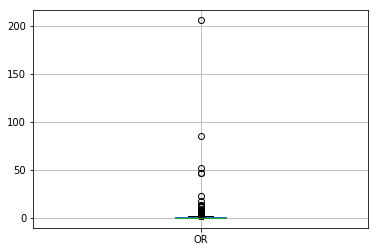

In [365]:
SB_t21_df.boxplot(column = 'OR')

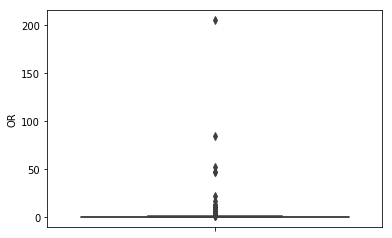

In [366]:
sns.boxplot(y = SB_t21_df.OR)

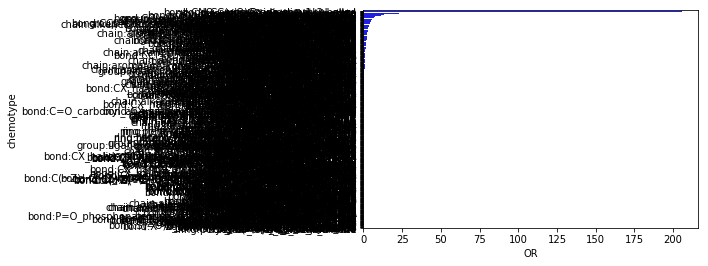

In [360]:
sns.barplot(x = 'OR', y = 'chemotype', color = 'b',label = "SB", data = SB_t21_df)

In [367]:
SB_t21_df.head()

OR             p                           chemotype
99          inf  6.990663e-02  bond:CNO_amineOxide_dimethyl_alkyl
77          inf  6.990663e-02      bond:CC(=O)C_quinone_1_2-benzo
476         inf  6.990663e-02      group:ligand_path_5_tridentate
53   205.916667  5.832680e-61             bond:C=O_aldehyde_alkyl
54    84.919460  6.036423e-47          bond:C=O_aldehyde_aromatic

In [368]:
SB_t21_df.sort_values(['OR', 'p'], ascending = [False, True])

OR             p  \
99          inf  6.990663e-02   
77          inf  6.990663e-02   
476         inf  6.990663e-02   
53   205.916667  5.832680e-61   
54    84.919460  6.036423e-47   
244   52.489945  1.594347e-34   
55    47.219631  9.153469e-98   
468   47.119584  2.507151e-07   
240   22.785354  7.099953e-42   
68    17.522588  6.192421e-46   
242   13.368330  5.793526e-03   
112   13.325901  1.349341e-01   
56    13.094540  5.719282e-19   
106   11.967509  3.125064e-18   
107   11.129496  1.464971e-16   
243    9.661695  9.698592e-36   
87     8.030554  3.953533e-49   
72     7.348074  6.218303e-07   
474    7.066282  2.284967e-06   
473    6.885690  1.070287e-14   
180    6.671821  6.061295e-02   
451    6.671821  6.061295e-02   
379    6.662093  1.954224e-01   
14     6.662093  1.954224e-01   
461    6.007449  5.658466e-12   
357    5.584163  1.240403e-07   
489    5.308028  4.890841e-05   
73     5.179886  6.716181e-29   
209    5.124331  6.326329e-05   
358    5.030709  3.225653e-03   
..          ...           ...   
238    0.000000  1.000000e+00   
234    0.000000  1.000000e+00   
233    0.000000  1.000000e+00   
230    0.000000  1.000000e+00   
258    0.000000  1.000000e+00   
227    0.000000  1.000000e+00   
226    0.000000  1.000000e+00   
221    0.000000  1.000000e+00   
216    0.000000  1.000000e+00   
215    0.000000  1.000000e+00   
214    0.000000  1.000000e+00   
256    0.000000  1.000000e+00   
289    0.000000  1.000000e+00   
278    0.000000  1.000000e+00   
288    0.000000  1.000000e+00   
287    0.000000  1.000000e+00   
285    0.000000  1.000000e+00   
283    0.000000  1.000000e+00   
282    0.000000  1.000000e+00   
281    0.000000  1.000000e+00   
280    0.000000  1.000000e+00   
279    0.000000  1.000000e+00   
277    0.000000  1.000000e+00   
275    0.000000  1.000000e+00   
274    0.000000  1.000000e+00   
270    0.000000  1.000000e+00   
269    0.000000  1.000000e+00   
264    0.000000  1.000000e+00   
263    0.000000  1.000000e+00   
613    0.000000  1.000000e+00   

                                             chemotype  
99                  bond:CNO_amineOxide_dimethyl_alkyl  
77                      bond:CC(=O)C_quinone_1_2-benzo  
476                     group:ligand_path_5_tridentate  
53                             bond:C=O_aldehyde_alkyl  
54                          bond:C=O_aldehyde_aromatic  
244                 bond:quatN_trimethyl_alkyl_acyclic  
55                           bond:C=O_aldehyde_generic  
468                 group:ligand_path_5_bidentate_ACAC  
240                           bond:quatN_alkyl_acyclic  
68              bond:CC(=O)C_ketone_alkene_cyclic_(C6)  
242                              bond:quatN_b-carbonyl  
112                       bond:COH_alcohol_diol_(1_1-)  
56                            bond:C=O_carbonyl_1_2-di  
106                            bond:COH_alcohol_alkene  
107                     bond:COH_alcohol_alkene_cyclic  
243                                 bond:quatN_generic  
87                         bond:CN_amine_pri-NH2_alkyl  
72        bond:CC(=O)C_ketone_alkene_cyclic_3-en-1-one  
474        group:ligand_path_5_bidentate_propanolamine  
473        group:ligand_path_5_bidentate_propandiamine  
180                    bond:N(=O)_nitro_ab-unsaturated  
451                        group:carbohydrate_inositol  
379            chain:alkeneLinear_mono-ene_oleic_(C18)  
14                 bond:C(~Z)~C~Q_a-haloketone_perhalo  
461      group:ligand_path_4_bidentate_ethylenediamine  
357                   chain:alkaneLinear_hexadecyl_C16  
489                            ring:fused_[5_6]_indane  
73                  bond:CC(=O)C_ketone_alkene_generic  
209                            bond:NO_amine_hyrdroxyl  
358                     chain:alkaneLinear_stearyl_C18  
..                                                 ...  
238                         bond:QQ(Q~O_S)_sulfide_di-  
234                                  bond:PO_phosphite  
233                         

In [373]:
#OR >2
SB_t21_filt = SB_t21_df[(SB_t21_df['OR'] > 2) & (SB_t21_df['OR'] != np.inf)]

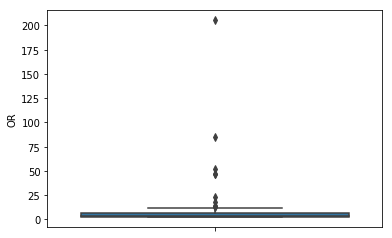

In [374]:
sns.boxplot(y = SB_t21_filt.OR)

In [377]:
SNAR_t21_filt = SNAR_t21_df[(SNAR_t21_df['OR'] > 2) & (SNAR_t21_df['OR'] != np.inf)]
SN2_t21_filt = SN2_t21_df[(SN2_t21_df['OR'] > 2) & (SN2_t21_df['OR'] != np.inf)]
Acyl_t21_filt = Acyl_t21_df[(Acyl_t21_df['OR'] > 2) & (Acyl_t21_df['OR'] != np.inf)]
MA_t21_filt = MA_t21_df[(MA_t21_df['OR'] > 2) & (MA_t21_df['OR'] != np.inf)]

In [378]:
MA_t21_filt.head()

OR             p                         chemotype
467  25.606612  1.505045e-02  group:ligand_path_4-5_tridentate
475  25.606612  1.505045e-02    group:ligand_path_5_macrocycle
8    20.946193  1.336432e-12   bond:C#N_nitrile_ab-unsaturated
490  19.234272  3.416170e-03           ring:fused_[5_6]_indene
191  17.460628  4.425219e-21             bond:N=N_azo_aromatic

In [376]:
SB_filt = SB_ors_df[(SB_ors_df['OR'] > 2) & (SB_ors_df['OR'] != np.inf)]
SNAR_filt = SNAR_ors_df[(SNAR_ors_df['OR'] > 2) & (SNAR_ors_df['OR'] != np.inf)]
SN2_filt =  SN2_ors_df[(SN2_ors_df['OR'] > 2) & (SN2_ors_df['OR'] != np.inf)]
Acyl_filt = Acyl_ors_df[(Acyl_ors_df['OR'] > 2) & (Acyl_ors_df['OR'] != np.inf)]
MA_filt = MA_or_df[(MA_or_df['OR'] > 2) & (MA_or_df['OR'] != np.inf)]

In [379]:
MA_filt.head()

OR             p  \
16   24.580247  2.392984e-07   
26   18.724138  7.902224e-06   
169  12.573333  2.803979e-10   
167  10.161290  5.059460e-04   
14    9.048000  5.230664e-06   

                                             chemotype  
16                 bond:C(=O)O_carboxylicEster_alkenyl  
26   bond:C=O_carbonyl_ab-unsaturated_aliphatic_(mi...  
169       chain:alkeneLinear_mono-ene_ethylene_generic  
167      chain:alkeneLinear_mono-ene_ehtylene_terminal  
14                 bond:C(=O)O_carboxylicEster_acyclic

In [382]:
def Intersection(lst1,lst2):
    return list(set(lst1) & set(lst2))
    

In [384]:
def Union(lst1,lst2):
    return list(set(lst1) | set(lst2))

In [385]:
def Difference(lst1,lst2):
    return list(set(lst1) - set(lst2))

In [403]:
def Clean(df1,df2):
    df3 = pd.merge(df1,df2, on='chemotype', how = 'outer')
    df3.rename(columns = {'OR_x': 't21_OR', 'p_x': 't21_p' ,'OR_y': 'jrc_OR', 'p_y': 'jrc_p'}, inplace = True)
    return df3

In [406]:
MA = Clean(MA_t21_filt,MA_filt)
SB = Clean(SB_t21_filt,SB_filt)
SNAR = Clean(SNAR_t21_filt,SNAR_filt)
Acyl = Clean(Acyl_t21_filt,Acyl_filt)
SN2 = Clean(SN2_t21_filt,SN2_filt)

In [408]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('toxprint_enrichment_comparisons.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
SB.to_excel(writer, sheet_name='SB')
SNAR.to_excel(writer, sheet_name='SNAR')
SN2.to_excel(writer, sheet_name='SN2')
Acyl.to_excel(writer, sheet_name='Acyl')
MA.to_excel(writer, sheet_name='MA')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [239]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('toxprint_enrichment_comparisons_postryan.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
SB2.to_excel(writer, sheet_name='SB')
SNAR2.to_excel(writer, sheet_name='SNAR')
SN2v.to_excel(writer, sheet_name='SN2')
Acyl2.to_excel(writer, sheet_name='Acyl')
MA2.to_excel(writer, sheet_name='MA')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [233]:
MA2.head()

TP_tox21  Balanced Accuracy_tox21  \
bond:C#N_nitrile_ab-unsaturated          16.0                 0.512534   
bond:C(=O)O_carboxylicAcid_alkenyl       44.0                 0.527273   
bond:C(=O)O_carboxylicEster_acyclic       NaN                      NaN   
bond:C(=O)O_carboxylicEster_alkenyl     118.0                 0.589648   
bond:C=N_imine_C(connect_H_gt_0)         16.0                 0.511308   

                                        t21_OR         t21_p  TP_jrc  \
bond:C#N_nitrile_ab-unsaturated      20.946193  1.336432e-12     NaN   
bond:C(=O)O_carboxylicAcid_alkenyl    4.277598  5.860341e-13     NaN   
bond:C(=O)O_carboxylicEster_acyclic        NaN           NaN    13.0   
bond:C(=O)O_carboxylicEster_alkenyl  15.736633  1.129777e-73    11.0   
bond:C=N_imine_C(connect_H_gt_0)      7.205088  4.399568e-08     NaN   

                                     Balanced Accuracy_jrc     jrc_OR  \
bond:C#N_nitrile_ab-unsaturated                        NaN        NaN   
bond:C(=O)O_carboxylicAcid_alkenyl                     NaN        NaN   
bond:C(=O)O_carboxylicEster_acyclic               0.643879   9.048000   
bond:C(=O)O_carboxylicEster_alkenyl               0.636585  24.580247   
bond:C=N_imine_C(connect_H_gt_0)                       NaN        NaN   

                                            jrc_p  
bond:C#N_nitrile_ab-unsaturated               NaN  
bond:C(=O)O_carboxylicAcid_alkenyl            NaN  
bond:C(=O)O_carboxylicEster_acyclic  5.230664e-06  
bond:C(=O)O_carboxylicEster_alkenyl  2.392984e-07  
bond:C=N_imine_C(connect_H_gt_0)              NaN

In [269]:
jrc_enriched2 = MA2[(MA2['jrc_OR'] >0) & (MA2['t21_OR'].isnull()) ]
tox21_enriched2 = MA2[(MA2['t21_OR'] >0) & (MA2['jrc_OR'].isnull()) ]
common_enriched2 = MA2[(MA2['t21_OR'] >0) & (MA2['jrc_OR'] >0) ]
print(len(jrc_enriched2))
print(len(tox21_enriched2))
print(len(common_enriched2))


1
20
13


In [265]:
jrc_enriched2 = SB2[(SB2['jrc_OR'] >0) & (SB2['t21_OR'].isnull()) ]
tox21_enriched2 = SB2[(SB2['t21_OR'] >0) & (SB2['jrc_OR'].isnull()) ]
common_enriched2 = SB2[(SB2['t21_OR'] >0) & (SB2['jrc_OR'] >0) ]
print(len(jrc_enriched2))
print(len(tox21_enriched2))
print(len(common_enriched2))

0
0
13


In [266]:
jrc_enriched2 = SNAR2[(SNAR2['jrc_OR'] >0) & (SNAR2['t21_OR'].isnull()) ]
tox21_enriched2 = SNAR2[(SNAR2['t21_OR'] >0) & (SNAR2['jrc_OR'].isnull()) ]
common_enriched2 = SNAR2[(SNAR2['t21_OR'] >0) & (SNAR2['jrc_OR'] >0) ]
print(len(jrc_enriched2))
print(len(tox21_enriched2))
print(len(common_enriched2))

0
30
0


In [267]:
jrc_enriched2 = SN2v[(SN2v['jrc_OR'] >0) & (SN2v['t21_OR'].isnull()) ]
tox21_enriched2 = SN2v[(SN2v['t21_OR'] >0) & (SN2v['jrc_OR'].isnull()) ]
common_enriched2 = SN2v[(SN2v['t21_OR'] >0) & (SN2v['jrc_OR'] >0) ]
print(len(jrc_enriched2))
print(len(tox21_enriched2))
print(len(common_enriched2))

8
58
2


In [268]:
jrc_enriched2 = Acyl2[(Acyl2['jrc_OR'] >0) & (Acyl2['t21_OR'].isnull()) ]
tox21_enriched2 = Acyl2[(Acyl2['t21_OR'] >0) & (Acyl2['jrc_OR'].isnull()) ]
common_enriched2 = Acyl2[(Acyl2['t21_OR'] >0) & (Acyl2['jrc_OR'] >0) ]
print(len(jrc_enriched2))
print(len(tox21_enriched2))
print(len(common_enriched2))

5
57
1


In [271]:
majrc = jrc_tp[jrc_tp['MA'] ==1]

In [302]:
majrc.head()

DTXSID                            variable  value
57   DTXSID2052100     bond:C#N_nitrile_ab-unsaturated    1.0
95   DTXSID2052100            bond:C#N_nitrile_generic    1.0
133  DTXSID2052100                    bond:C#N_nitrile    1.0
371  DTXSID7024166           bond:C(=O)O_acidAnhydride    1.0
405  DTXSID3021518  bond:C(=O)O_carboxylicAcid_alkenyl    1.0

In [273]:
majrc.columns.tolist()

['DTXSID',
 'LLNA',
 'Consensus_mech',
 'atom:element_metal_group_I_II',
 'bond:C#N_nitrile_ab-unsaturated',
 'bond:C#N_nitrile_generic',
 'bond:C#N_nitrile',
 'bond:C(~Z)~C~Q_b-halocarbonyl',
 'bond:C(=O)N_carbamate_dithio',
 'bond:C(=O)N_carboxamide_(NHR)',
 'bond:C(=O)N_carboxamide_(NR2)',
 'bond:C(=O)N_carboxamide_generic',
 'bond:C(=O)O_acidAnhydride',
 'bond:C(=O)O_carboxylicAcid_alkenyl',
 'bond:C(=O)O_carboxylicAcid_alkyl',
 'bond:C(=O)O_carboxylicAcid_aromatic',
 'bond:C(=O)O_carboxylicAcid_generic',
 'bond:C(=O)O_carboxylicEster_acyclic',
 'bond:C(=O)O_carboxylicEster_aliphatic',
 'bond:C(=O)O_carboxylicEster_alkenyl',
 'bond:C(=O)O_carboxylicEster_alkyl',
 'bond:C(=O)O_carboxylicEster_aromatic',
 'bond:C=N_guanidine_generic',
 'bond:C=O_acyl_halide',
 'bond:C=O_aldehyde_alkyl',
 'bond:C=O_aldehyde_aromatic',
 'bond:C=O_aldehyde_generic',
 'bond:C=O_carbonyl_1_2-di',
 'bond:C=O_carbonyl_ab-acetylenic',
 'bond:C=O_carbonyl_ab-unsaturated_aliphatic_(michael_acceptors)',
 'bond:

In [274]:
majrc.drop(['LLNA','Consensus_mech','rxn_domains',
 'no_domain',
 'Acyl',
 'MA',
 'SB',
 'SN2',
 'SNAR'], axis = 1, inplace = True)

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [275]:
majrc = majrc.replace(0,np.nan)

In [276]:
majrc.columns.tolist()

['DTXSID',
 'atom:element_metal_group_I_II',
 'bond:C#N_nitrile_ab-unsaturated',
 'bond:C#N_nitrile_generic',
 'bond:C#N_nitrile',
 'bond:C(~Z)~C~Q_b-halocarbonyl',
 'bond:C(=O)N_carbamate_dithio',
 'bond:C(=O)N_carboxamide_(NHR)',
 'bond:C(=O)N_carboxamide_(NR2)',
 'bond:C(=O)N_carboxamide_generic',
 'bond:C(=O)O_acidAnhydride',
 'bond:C(=O)O_carboxylicAcid_alkenyl',
 'bond:C(=O)O_carboxylicAcid_alkyl',
 'bond:C(=O)O_carboxylicAcid_aromatic',
 'bond:C(=O)O_carboxylicAcid_generic',
 'bond:C(=O)O_carboxylicEster_acyclic',
 'bond:C(=O)O_carboxylicEster_aliphatic',
 'bond:C(=O)O_carboxylicEster_alkenyl',
 'bond:C(=O)O_carboxylicEster_alkyl',
 'bond:C(=O)O_carboxylicEster_aromatic',
 'bond:C=N_guanidine_generic',
 'bond:C=O_acyl_halide',
 'bond:C=O_aldehyde_alkyl',
 'bond:C=O_aldehyde_aromatic',
 'bond:C=O_aldehyde_generic',
 'bond:C=O_carbonyl_1_2-di',
 'bond:C=O_carbonyl_ab-acetylenic',
 'bond:C=O_carbonyl_ab-unsaturated_aliphatic_(michael_acceptors)',
 'bond:C=O_carbonyl_ab-unsaturated_

In [277]:
majrc = pd.melt(majrc, id_vars = ['DTXSID'] )
majrc = majrc.dropna(axis = 0)

In [278]:
ma_tps = ma_tps.replace('-', np.nan)

In [279]:
t21m = pd.melt(ma_tps, id_vars = ['DTXSID'])
t21m = t21m.dropna(axis = 0)

In [303]:
t21m.head()

DTXSID                       variable  value
628  DTXSID0027513  atom:element_metal_group_I_II    1.0
637  DTXSID0035790  atom:element_metal_group_I_II    1.0
639  DTXSID0038881  atom:element_metal_group_I_II    1.0
647  DTXSID0046066  atom:element_metal_group_I_II    1.0
648  DTXSID0046488  atom:element_metal_group_I_II    1.0

In [281]:
majrc.head()

DTXSID                            variable  value
57   DTXSID2052100     bond:C#N_nitrile_ab-unsaturated    1.0
95   DTXSID2052100            bond:C#N_nitrile_generic    1.0
133  DTXSID2052100                    bond:C#N_nitrile    1.0
371  DTXSID7024166           bond:C(=O)O_acidAnhydride    1.0
405  DTXSID3021518  bond:C(=O)O_carboxylicAcid_alkenyl    1.0

In [304]:
jrc_enriched = MA2[(MA2['jrc_OR'] >0) & (MA2['t21_OR'].isnull()) ]

In [305]:
tox21_enriched = MA2[(MA2['t21_OR'] >0) & (MA2['jrc_OR'].isnull()) ]

In [306]:
common_enriched = MA2[(MA2['t21_OR'] >0) & (MA2['jrc_OR'] >0) ]

In [307]:
print(len(jrc_enriched))
print(len(tox21_enriched))
print(len(common_enriched))


1
20
13


In [308]:
jrc_enriched

TP_tox21  Balanced Accuracy_tox21  \
bond:C(=O)O_carboxylicEster_acyclic       NaN                      NaN   

                                     t21_OR  t21_p  TP_jrc  \
bond:C(=O)O_carboxylicEster_acyclic     NaN    NaN    13.0   

                                     Balanced Accuracy_jrc  jrc_OR     jrc_p  
bond:C(=O)O_carboxylicEster_acyclic               0.643879   9.048  0.000005

In [291]:
jrc_list = jrc_enriched.index.tolist()

In [292]:
jrc_list

['bond:C(=O)O_carboxylicEster_acyclic']

In [293]:
tox21_list = tox21_enriched.index.tolist()

In [294]:
common_list = common_enriched.index.tolist()

In [295]:
jrc_only = majrc[majrc['variable'].isin(jrc_list)]

In [296]:
jrc_common = majrc[majrc['variable'].isin(common_list)]

In [297]:
tox21_common = t21m[t21m['variable'].isin(common_list)]

In [298]:
tox21_only = t21m[t21m['variable'].isin(tox21_list)]

In [299]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('structure_examples_comparisons_postryan.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
tox21_only.to_excel(writer, sheet_name='tox21_only')
tox21_common.to_excel(writer, sheet_name='tox21_common')
jrc_only.to_excel(writer, sheet_name='jrc_only')
jrc_common.to_excel(writer, sheet_name='jrc_common')


# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [309]:
grouped = tox21_only.groupby(['DTXSID']).nunique().sort_values(by = ['variable'], ascending = False)

In [310]:
grouped5 = grouped[grouped['variable'] >5]

In [311]:
grp = tox21_common.groupby(['DTXSID']).nunique().sort_values(by = ['variable'], ascending = False)

In [312]:
gr5 = grp[grp['variable'] >5]

In [313]:
grpj = jrc_common.groupby(['DTXSID']).nunique().sort_values(by = ['variable'], ascending = False)

In [314]:
grpj5 = grpj[grpj['variable'] >5]

In [315]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('examples_structures_with_multiple_tps_postryan.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
grouped5.to_excel(writer, sheet_name='grouped_tox21_only')
gr5.to_excel(writer, sheet_name='tox21_common')
grpj5.to_excel(writer, sheet_name='jrc_common')


# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [87]:
import progressbar
import pandas as pd
import scipy.stats as stats
import click

def enrich(my_full_table):
    # CREATE THE ENRICHMENT TABLE
    endpoint = my_full_table.columns[1]
    row_names = my_full_table.columns[2:]
    column_names = ['TP', 'FP', 'FN', 'TN', 'Odds Ratio', 'Pval']
    enrichment_table = pd.DataFrame(index=row_names, columns=column_names, dtype=float)
    enrichment_table = enrichment_table.fillna(value=0.0)
    # PROGRESS BAR
    bar = progressbar.ProgressBar(max_value=(len(my_full_table[:])))
    # FILL THE CONFUSION MATRIX
    for index, row in my_full_table.iterrows():
        #progress bar update
        bar.update(index+1)
        if int(row[endpoint]) == 1:
            count = -1
            for i in row[my_full_table.columns[2]:]:
                count += 1
                if i == 1:
                    enrichment_table['TP'][row_names[count]] += 1
                elif i == 0:
                    enrichment_table['FN'][row_names[count]] += 1
        elif int(row[endpoint]) == 0:
            count = -1
            for i in row[my_full_table.columns[2]:]:
                count += 1
                if i == 1:
                    enrichment_table['FP'][row_names[count]] += 1
                elif i == 0:
                    enrichment_table['TN'][row_names[count]] += 1
        else:
            print('ERROR: ', index, row)
    # CALCULATE & FILL ODDS RATIOS & FISHER'S EXACT P-VALUES

    for index, row in enrichment_table.iterrows():
        oddsratio, pvalue = stats.fisher_exact([[row['TP'], row['FP']], [row['FN'], row['TN']]], alternative='greater')
        enrichment_table.loc[index, 'Pval'] = pvalue
        enrichment_table.loc[index, 'Odds Ratio'] = oddsratio

    # ROUNDS AND SETS VALUES AS INT
    # enrichment_table = enrichment_table.sort_values(by=['TP'], ascending=False)

    enrichment_table[['Odds Ratio', 'Pval']] = enrichment_table[['Odds Ratio', 'Pval']].round(decimals=3)
    enrichment_table[['TP', 'FP', 'FN', 'TN']] = enrichment_table[['TP', 'FP', 'FN', 'TN']].astype(int)
    return enrichment_table